# Check if the data is balanced or not

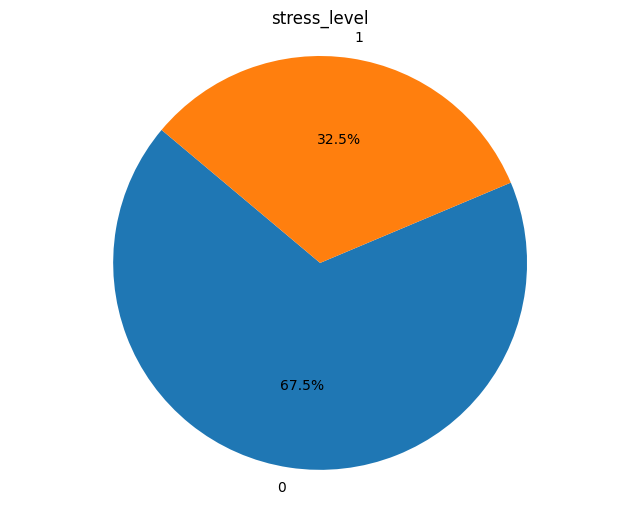

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('Updated_StressLevelDataset.csv')



column_name = 'stress_level'

# Count the occurrences of each value in the column
value_counts = df[column_name].value_counts()

# Calculate the percentage of each value
percentages = (value_counts / len(df)) * 100

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('stress_level')
plt.axis('equal')  
plt.show()

#### The data is not balanced, Because the Percentage of 0 is 66.5% and the Percentage of 1 is 32.5% and the Percentage of 2 is 33.9%

# Process of correcting data balancing:

In [2]:
import pandas as pd
from sklearn.utils import resample

# Load the dataset
df_updated = pd.read_csv('Updated_StressLevelDataset.csv')

# Separate the classes
df_class_0_updated = df_updated[df_updated['stress_level'] == 0]
df_class_1_updated = df_updated[df_updated['stress_level'] == 1]

# Calculate the number of samples needed for class '0' to achieve the desired balance
total_count_target = df_class_1_updated.shape[0] / 0.4
class_0_target_count = int(total_count_target * 0.6)

# Now we undersample class '0'
df_class_0_undersampled_updated = resample(df_class_0_updated, 
                                           replace=False, 
                                           n_samples=class_0_target_count, 
                                           random_state=123)  # For reproducibility

# Combine the undersampled class '0' with class '1'
df_balanced_updated = pd.concat([df_class_0_undersampled_updated, df_class_1_updated])

# Check the new class distribution
balanced_class_counts_updated = df_balanced_updated['stress_level'].value_counts(normalize=True) * 100

# Output the balanced dataset to a new CSV file
df_balanced_updated.to_csv('balanced_dataset.csv', index=False)

print(balanced_class_counts_updated)


0    60.0
1    40.0
Name: stress_level, dtype: float64


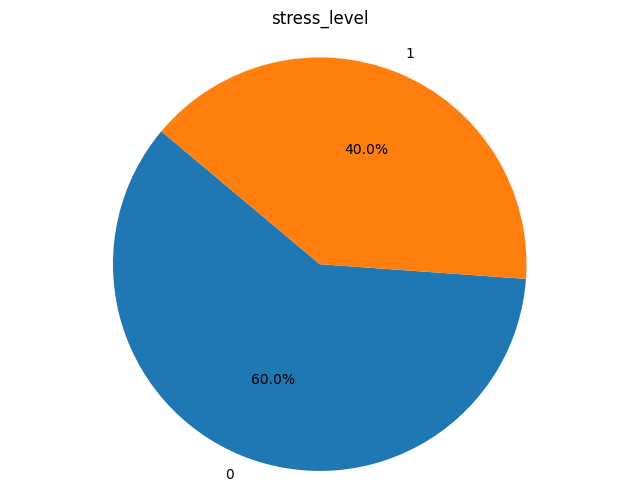

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('balanced_dataset.csv')



column_name = 'stress_level'

# Count the occurrences of each value in the column
value_counts = df[column_name].value_counts()

# Calculate the percentage of each value
percentages = (value_counts / len(df)) * 100

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('stress_level')
plt.axis('equal')  
plt.show()

#### We finally calculated the percentage for each class to ensure that the data has become balanced. The two classes represent Stress level balanced as the percentage of from 40% to 60%

### Importing Required

In [3]:
# Load libraries

import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier 
from sklearn.model_selection import train_test_split # Import train_test_split function 
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


### Loading Data

In [4]:
#Load data
df=pd.read_csv('balanced_dataset.csv')
print(df)

     anxiety_level  self_esteem  mental_health_history  depression  headache  \
0               20           10                      1          21         3   
1                3           30                      0           0         1   
2                3           17                      0          18         3   
3               16            9                      1          26         5   
4               17            5                      1          27         3   
..             ...          ...                    ...         ...       ...   
916             19           11                      1          25         4   
917              7           17                      0           0         4   
918              9           12                      0           8         0   
919             21            0                      1          19         5   
920             18            6                      1          15         3   

     blood_pressure  sleep_quality  bre

### Feature Selection

In [5]:
fn= df.keys().tolist()[:-1]
X= df[fn]
y=df['stress_level']


# Classification

Classification: In contrast, classification aims to assign predefined labels or classes to data instances based on their features. The goal is to build a model that can accurately predict the class of new, unseen data points. Classification is often used for tasks like spam detection, sentiment analysis, and medical diagnosis, where the goal is to categorize data into distinct classes or categories.


### Information Gain (entropy)

##  (90% Training and 10% Test)

### Evaluating the Model

In [7]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Identify and remove samples with missing values in y
missing_indices = np.isnan(y)
X = X[~missing_indices]
y = y[~missing_indices]

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion='entropy')

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = clf.predict(X_test)

### Confusion matrix

[[139  16]
 [ 26  95]]


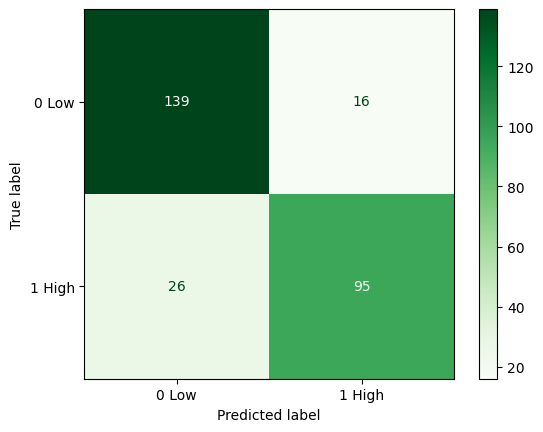

In [26]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt

#compute and print the confusion matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.metrics import ConfusionMatrixDisplay 
c=df['stress_level'].unique() 

cm = confusion_matrix(y_test, y_pred)
class_labels = {0:'0 Low', 1:'1 High'}

# create a confusion matrix display object 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[0], class_labels[1]])
disp.plot(cmap=plt.cm.Greens)
plt.show()

#### The Confusion Matrix represents the performance measurement of the classification model. we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification.
<br>
From the results, it appears:<br>
The top-left cell: (49) represents the number of instances of the negative class correctly classified as negative (TN).<br>
The top-right cell: (6) represents the number of instances of the negative class incorrectly classified as positive (FP).<br>
The bottom-left cell: (7) represents the number of instances of the positive class incorrectly classified as negative (FN).<br>
The bottom-right cell: (30) represents the number of instances of the positive class correctly classified as positive (TP).

### Decision Tree:

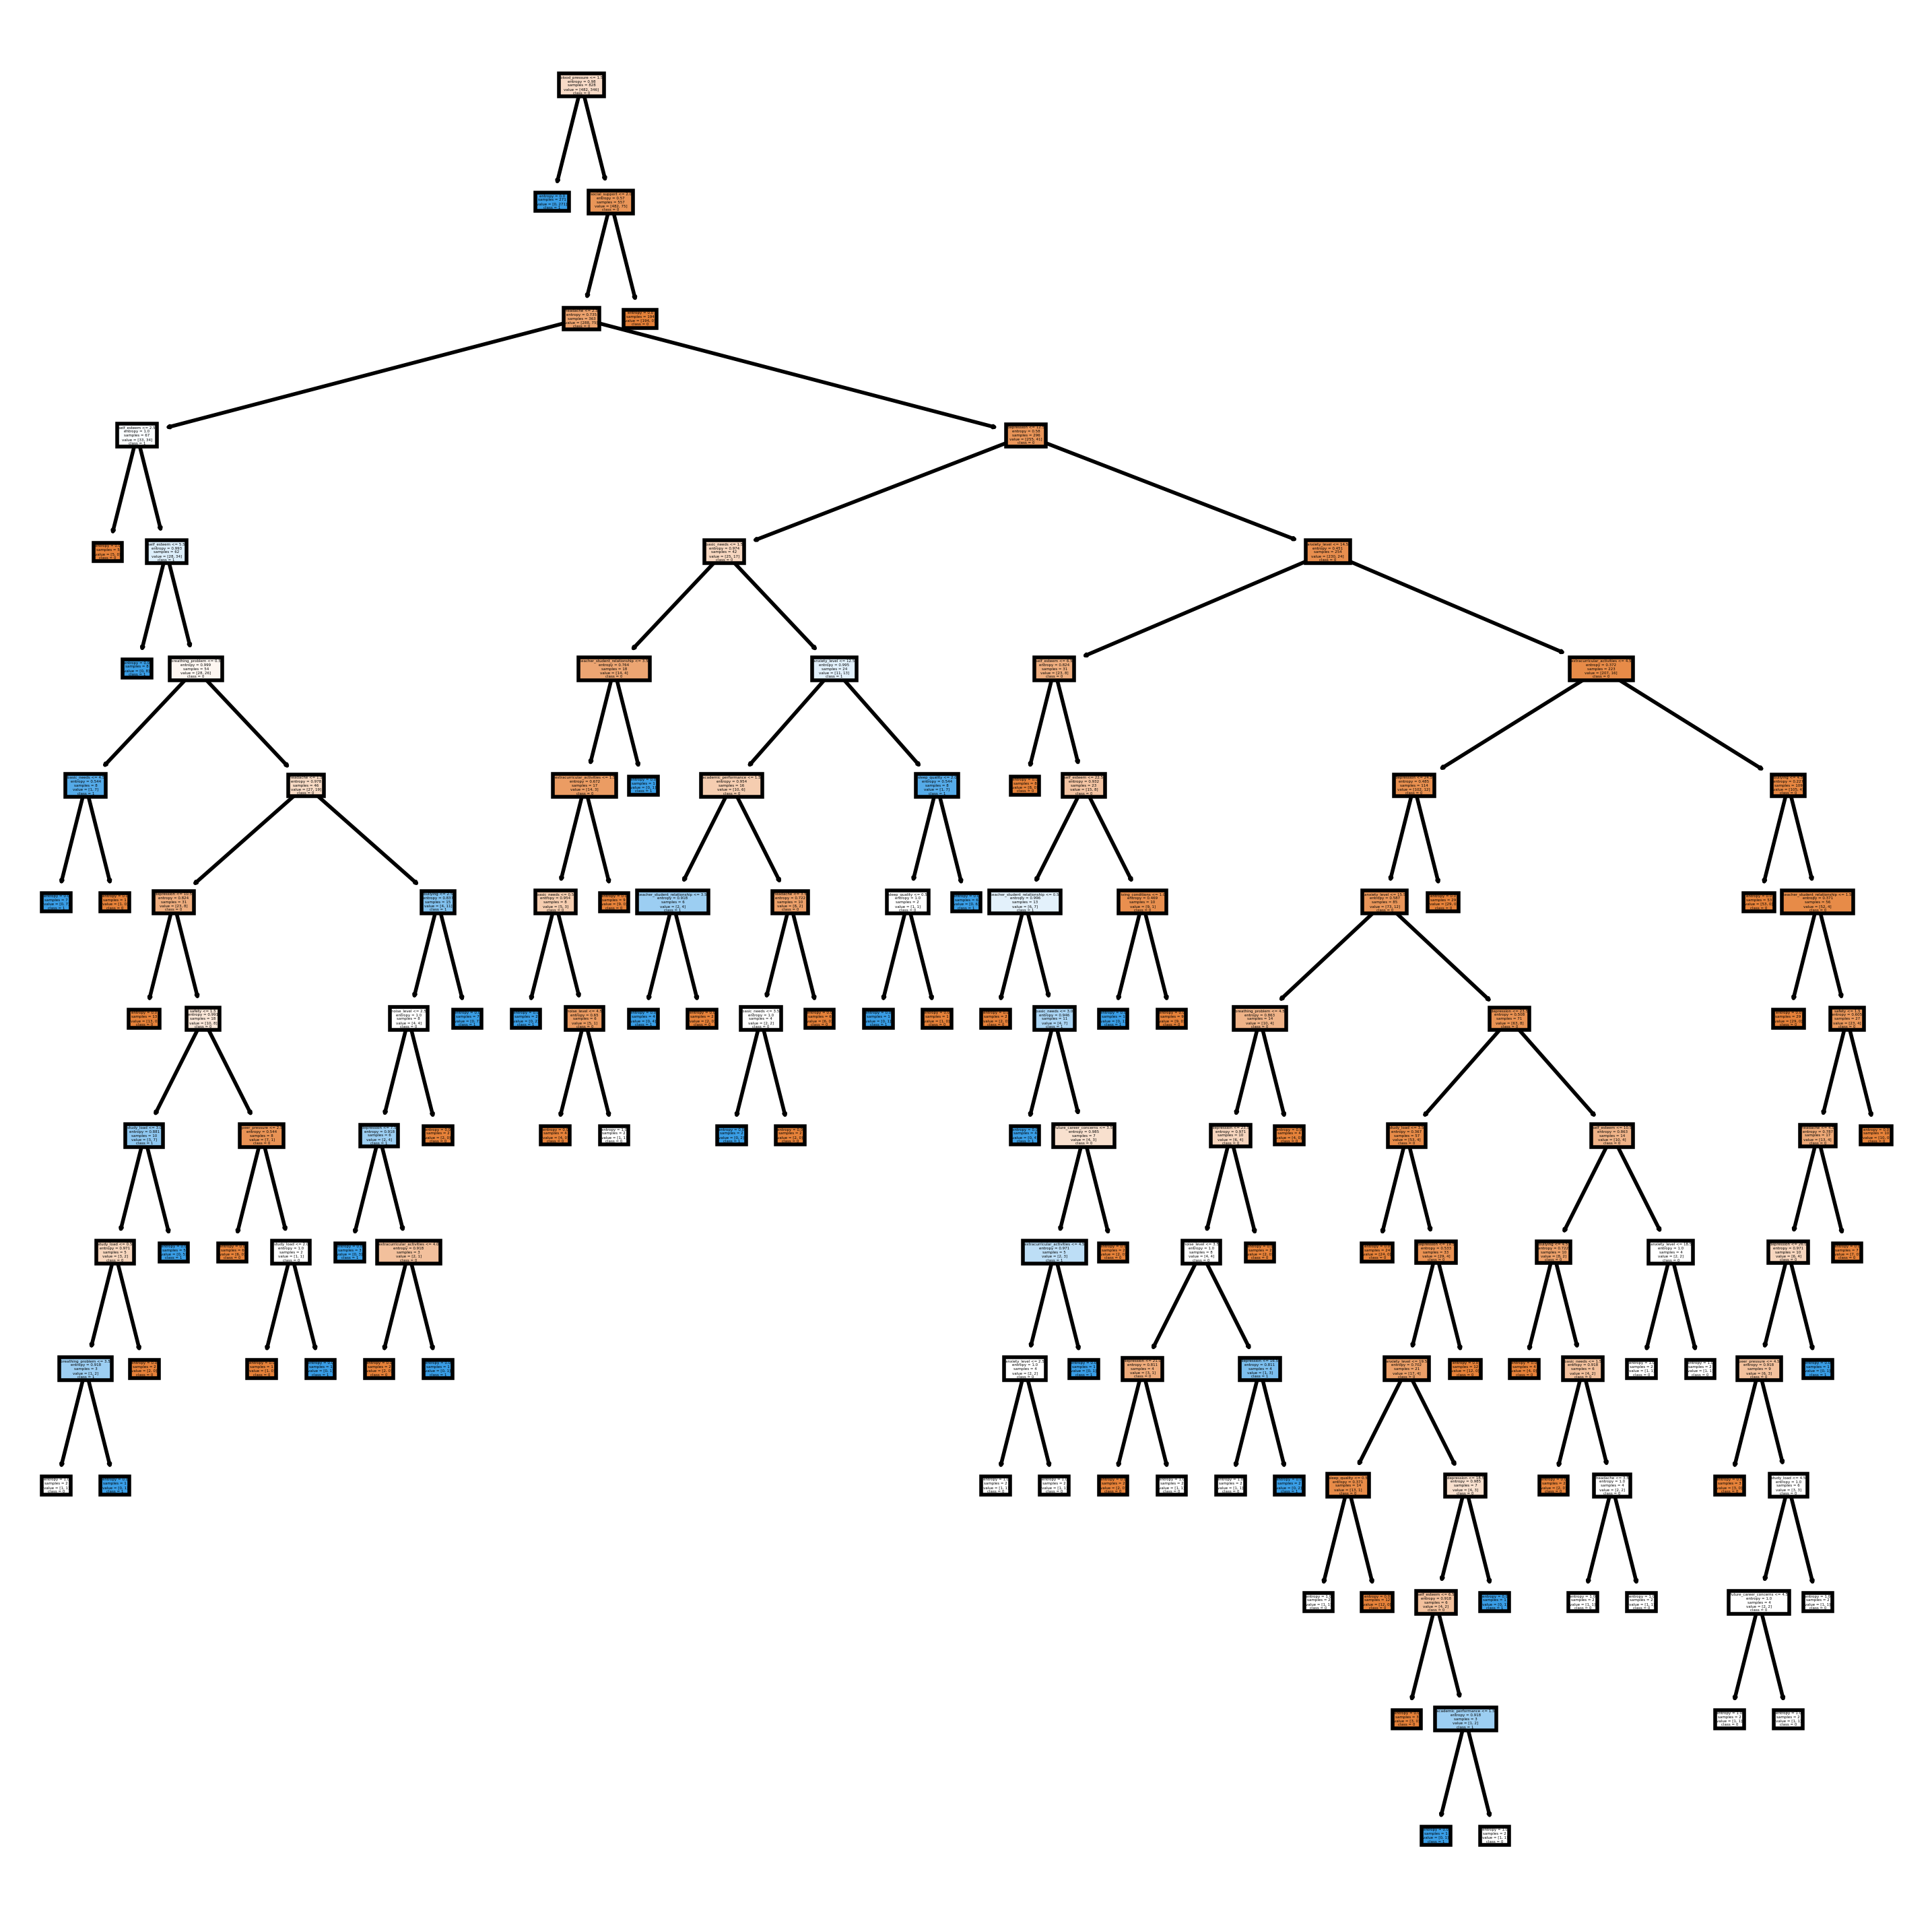

In [29]:
from sklearn import tree

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9,9), dpi=400)


class_labels = {0:'0', 1:'1'}

tree.plot_tree(clf,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1]], 
               filled=True
               )

plt.show()

#### As we shown the tree starts with the root node in this data is (blood_pressure) This means the tree branches out from the root node based on the (blood_pressure) value , The tree makes several splits based on the feature values, and these are represented by the decision nodes. The features at each node are selected based on gini index . also we have leaf Node this is the terminal nodes that provide the final classification based on the path taken through the tree.

In [14]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm)


#  Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Error Rate 
error_rate = 1 - accuracy
print("Error Rate:", error_rate)


# TN, FP, FN, TP :

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]


# Sensitivity 
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity 
specificity = TN / (TN + FP)
print("Specificity:", specificity)


# Precision 
precision = TP / (TP + FP)
print("Precision:", precision)


confusion matrix : 
 [[49  6]
 [ 7 30]]
Accuracy: 0.8586956521739131
Error Rate: 0.14130434782608692
Sensitivity: 0.8108108108108109
Specificity: 0.8909090909090909
Precision: 0.8333333333333334


-Accuracy: measures the proportion of true results. In this case, the model's accuracy is approximately 85%.<br>
-Error Rate: represents the proportion of wrong predictions out of all predictions.Here, the error rate is around 14%.<br>
-Sensitivity (Recall) : measures the proportion of actual positives that are correctly.In this case, it's approximately 81%.<br>
-Specificity : measures the proportion of actual negatives that are correctly.It's around 89% in this scenario.<br>
-Precision : the proportion of positive identifications that were actually correct. Here, it's about 83%.

## (80% Training and 20% Test)

### Evaluating the Model

In [15]:
# The dataset is divided into 80% training and 20% testing subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


#Create Decision Tree classifer object 
clf1 = DecisionTreeClassifier(criterion='entropy')

# Train Decision Tree Classifer
clf1 = clf1.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf1.predict(X_test)

### Confusion matrix

[[139  16]
 [ 26  95]]


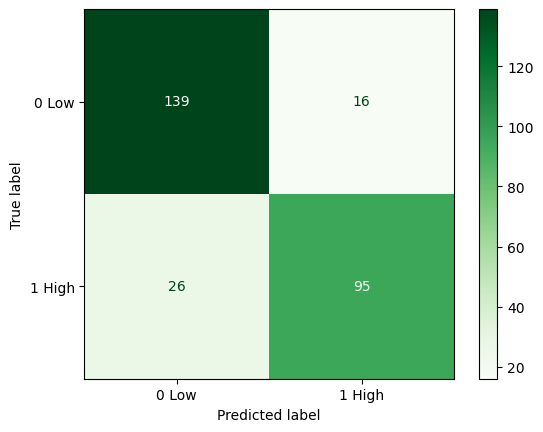

In [32]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt

#compute and print the confusion matrix

cm1 = confusion_matrix(y_test, y_pred)
print(cm1)

from sklearn.metrics import ConfusionMatrixDisplay 
c=df['stress_level'].unique() 

cm1 = confusion_matrix(y_test, y_pred)
class_labels = {0:'0 Low', 1:'1 High'}

# create a confusion matrix display object 
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=[class_labels[0], class_labels[1]])
disp.plot(cmap=plt.cm.Greens)
plt.show()

#### The Confusion Matrix represents the performance measurement of the classification model. we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification.
<br>
From the results, it appears:<br>
The top-left cell: (88) represents the number of instances of the negative class correctly classified as negative (TN).<br>
The top-right cell: (14) represents the number of instances of the negative class incorrectly classified as positive (FP).<br>
The bottom-left cell: (17) represents the number of instances of the positive class incorrectly classified as negative (FN).<br>
The bottom-right cell: (65) represents the number of instances of the positive class correctly classified as positive (TP).

### Decision Trees

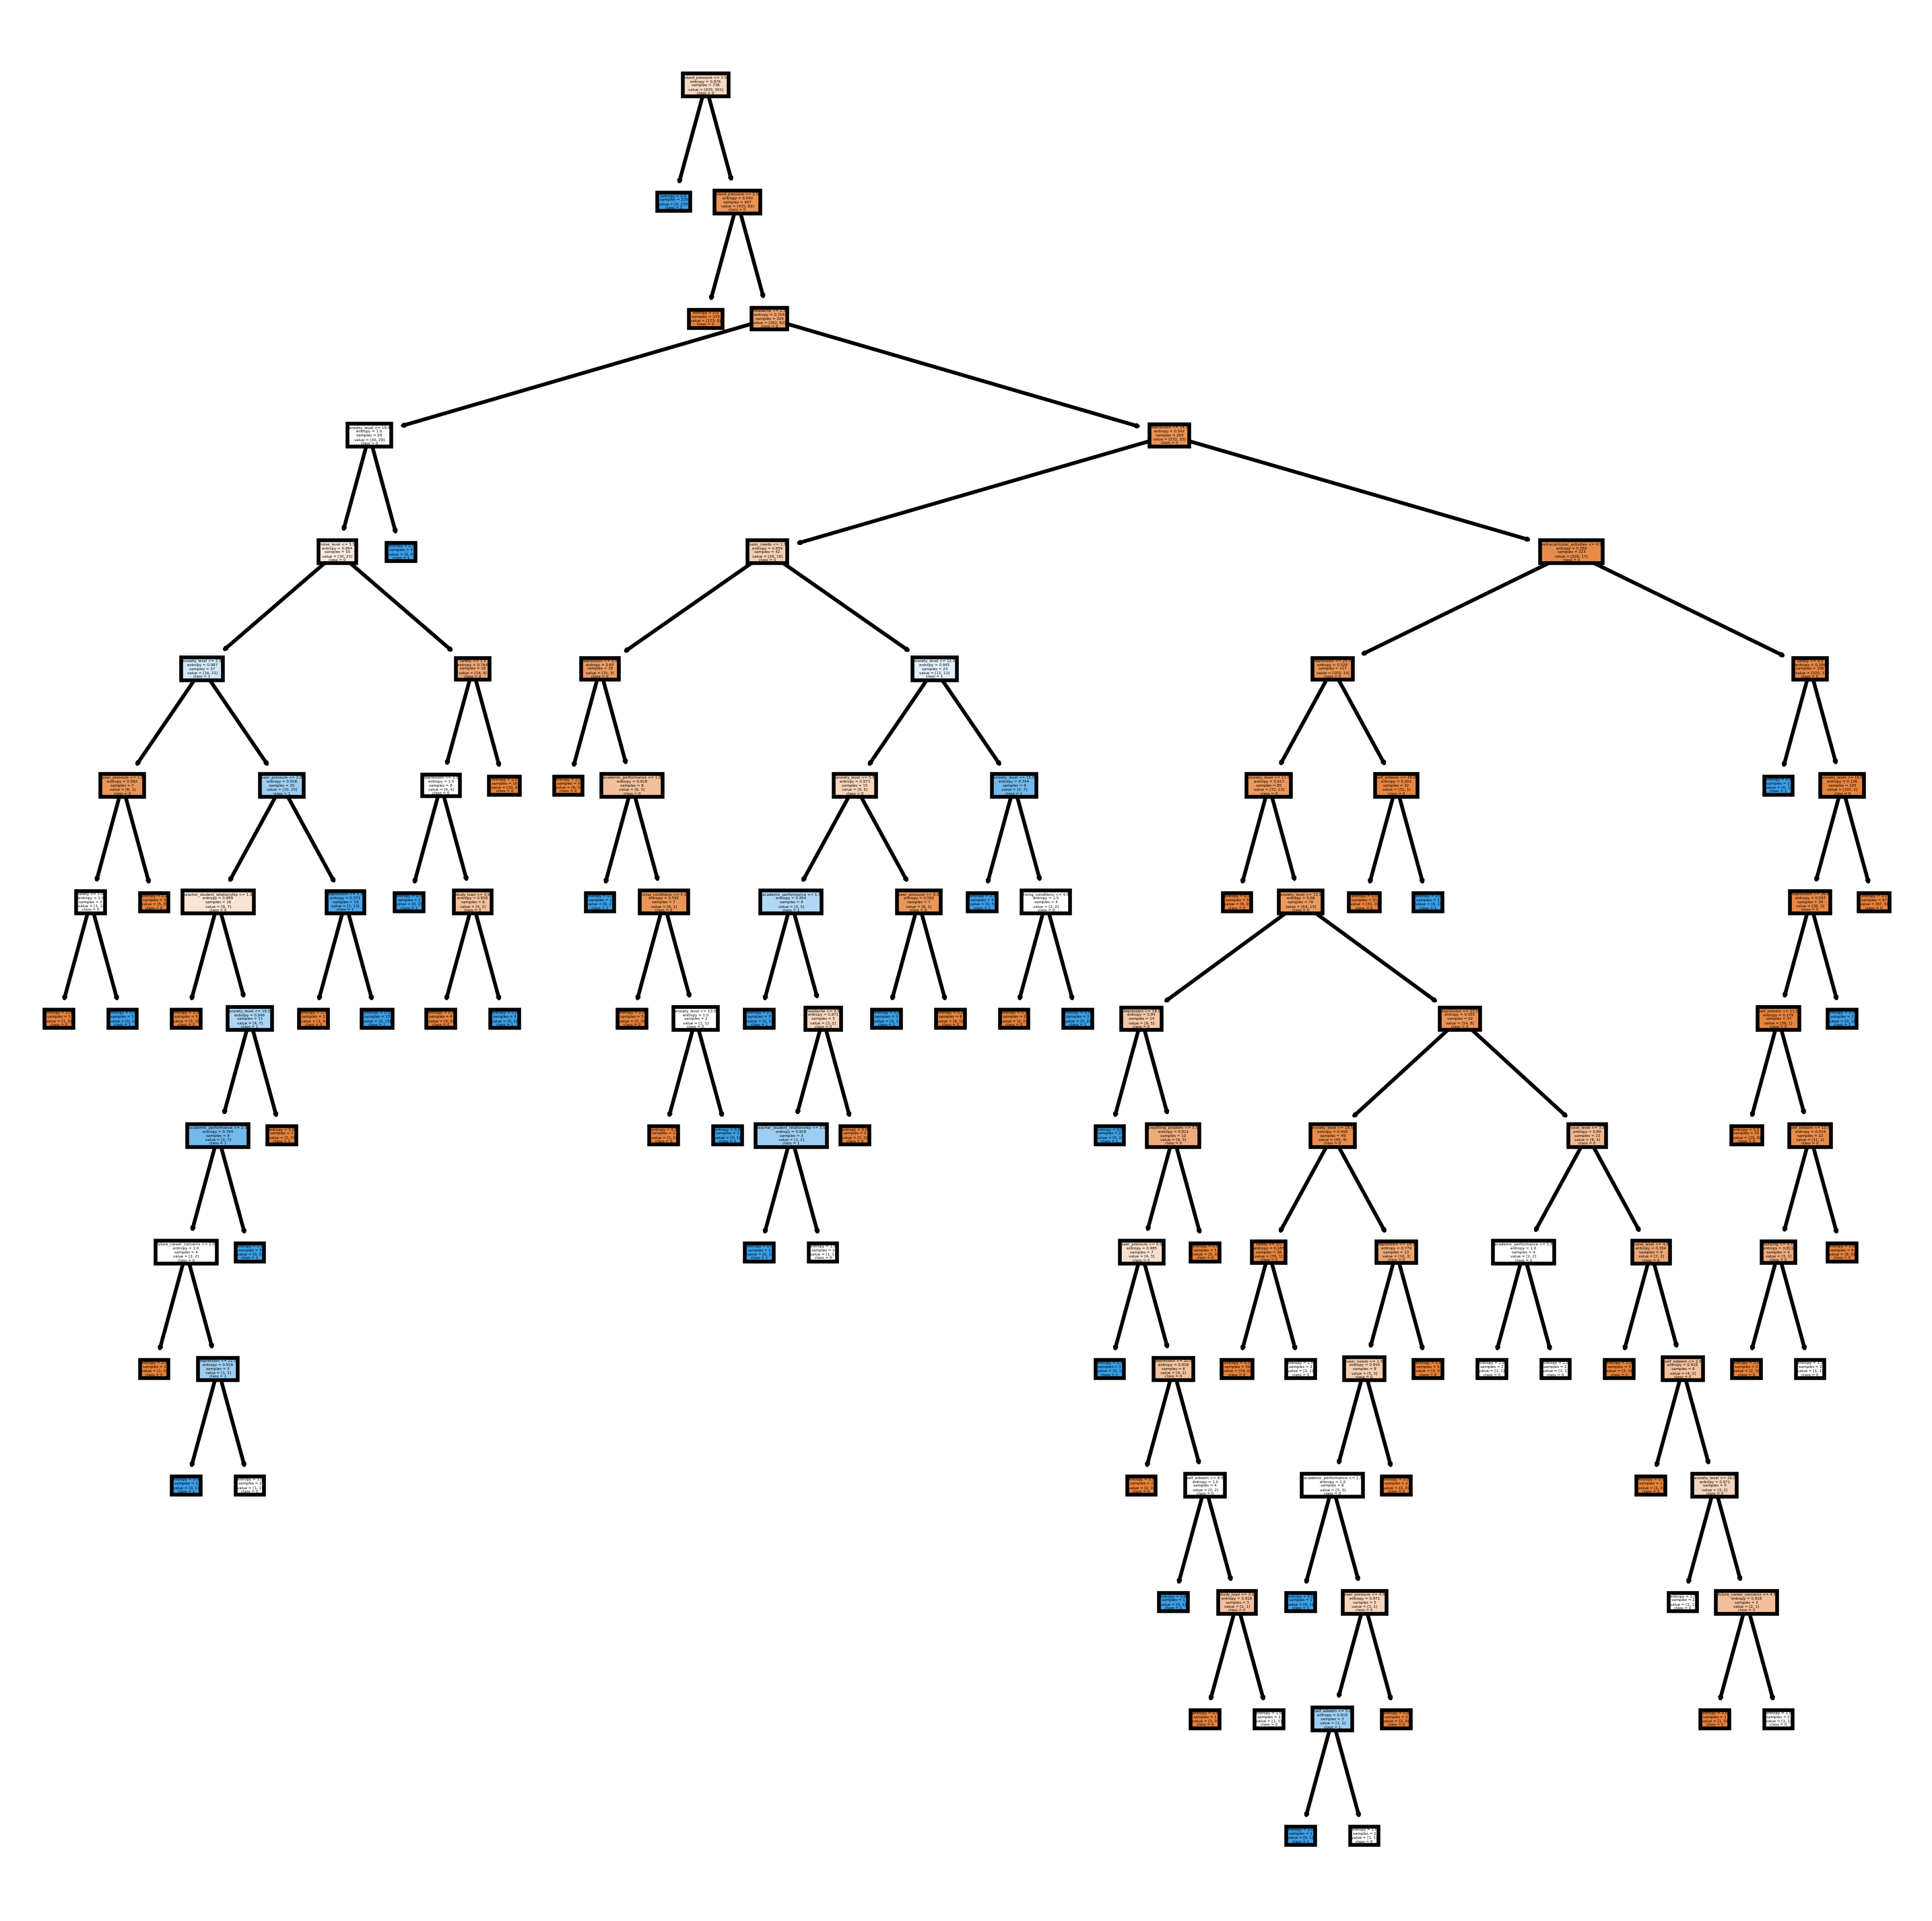

In [31]:
from sklearn import tree

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9,9), dpi=400)


class_labels = {0:'0', 1:'1'}

tree.plot_tree(clf1,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1]], 
               filled=True
               )

plt.show()


#### As we shown the tree starts with the root node in this data is (blood_pressure) This means the tree branches out from the root node based on the (blood_pressure) value , The tree makes several splits based on the feature values, and these are represented by the decision nodes. The features at each node are selected based on gini index . also we have leaf Node this is the terminal nodes that provide the final classification based on the path taken through the tree.

In [19]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm)


#  Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Error Rate 
error_rate = 1 - accuracy
print("Error Rate:", error_rate)


# TN, FP, FN, TP :

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]


# Sensitivity 
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity 
specificity = TN / (TN + FP)
print("Specificity:", specificity)


# Precision 
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[88 14]
 [17 65]]
Accuracy: 0.8315217391304348
Error Rate: 0.1684782608695652
Sensitivity: 0.7926829268292683
Specificity: 0.8627450980392157
Precision: 0.8227848101265823


-Accuracy: measures the proportion of true results. In this case, the model's accuracy is approximately 83%.<br>
-Error Rate: represents the proportion of wrong predictions out of all predictions.Here, the error rate is around 16%.<br>
-Sensitivity (Recall) : measures the proportion of actual positives that are correctly.In this case, it's approximately 79%.<br>
-Specificity : measures the proportion of actual negatives that are correctly.It's around 86% in this scenario.<br>
-Precision : the proportion of positive identifications that were actually correct. Here, it's about 82%.

## (70% Training and 30% Test)

### Evaluating the Model

In [20]:
# The dataset is divided into 70% training and 30% testing subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


#Create Decision Tree classifer object 
clf2 = DecisionTreeClassifier(criterion='entropy')

# Train Decision Tree Classifer
clf2 = clf2.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf2.predict(X_test)

### Confusion matrix

[[139  16]
 [ 26  95]]


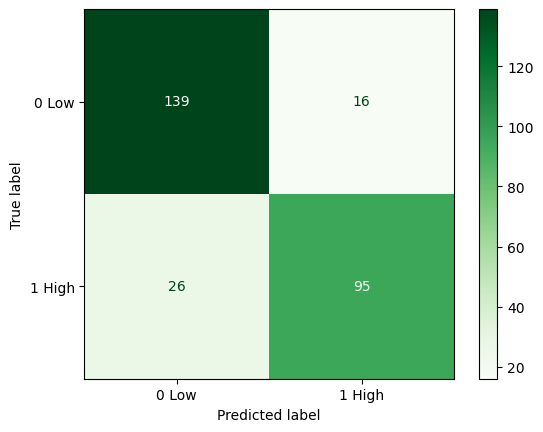

In [33]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt

#compute and print the confusion matrix

cm2 = confusion_matrix(y_test, y_pred)
print(cm1)

from sklearn.metrics import ConfusionMatrixDisplay 
c=df['stress_level'].unique() 

cm2 = confusion_matrix(y_test, y_pred)
class_labels = {0:'0 Low', 1:'1 High'}

# create a confusion matrix display object 
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=[class_labels[0], class_labels[1]])
disp.plot(cmap=plt.cm.Greens)
plt.show()

#### The Confusion Matrix represents the performance measurement of the classification model. we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification.
<br>
From the results, it appears:<br>
The top-left cell: (139) represents the number of instances of the negative class correctly classified as negative (TN).<br>
The top-right cell: (16) represents the number of instances of the negative class incorrectly classified as positive (FP).<br>
The bottom-left cell: (26) represents the number of instances of the positive class incorrectly classified as negative (FN).<br>
The bottom-right cell: (95) represents the number of instances of the positive class correctly classified as positive (TP).

### Decision Trees

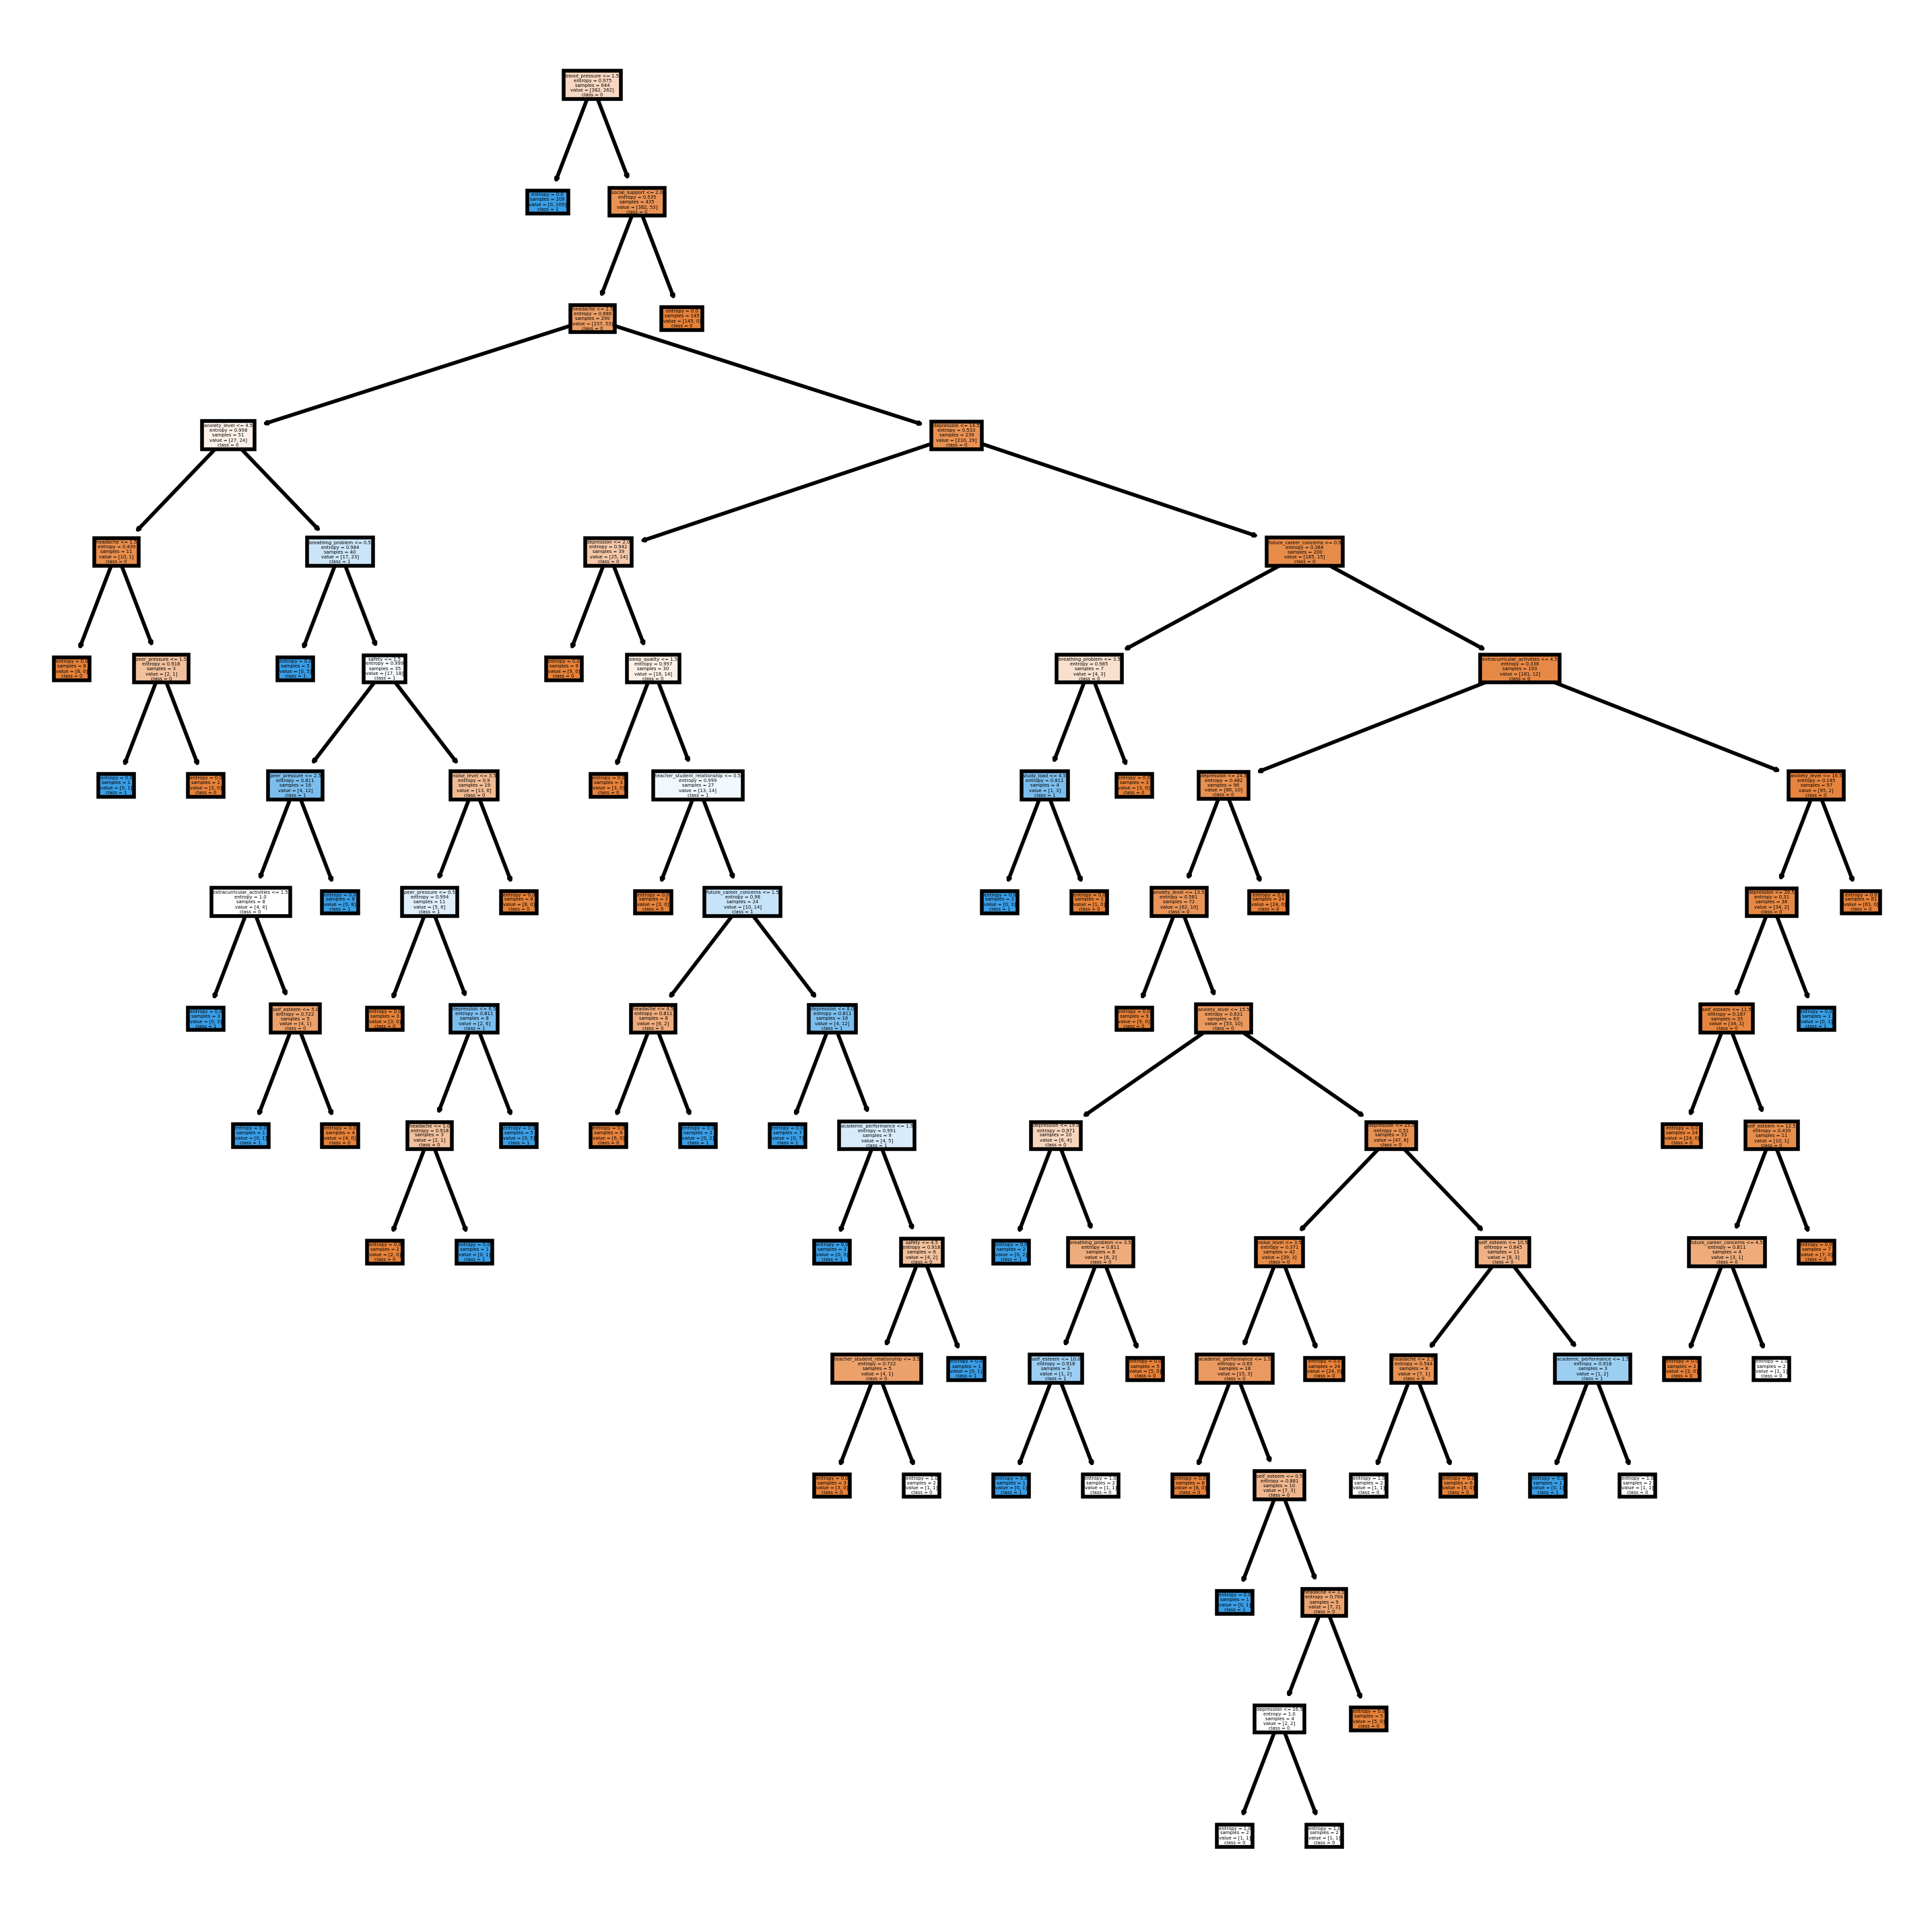

In [22]:
from sklearn import tree

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9,9), dpi=400)


class_labels = {0:'0', 1:'1'}

tree.plot_tree(clf2,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1]], 
               filled=True
               )

plt.show()

#### As we shown the tree starts with the root node in this data is (blood_pressure) This means the tree branches out from the root node based on the (blood_pressure) value , The tree makes several splits based on the feature values, and these are represented by the decision nodes. The features at each node are selected based on gini index . also we have leaf Node this is the terminal nodes that provide the final classification based on the path taken through the tree.

In [30]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm)


#  Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Error Rate 
error_rate = 1 - accuracy
print("Error Rate:", error_rate)


# TN, FP, FN, TP :

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]


# Sensitivity 
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity 
specificity = TN / (TN + FP)
print("Specificity:", specificity)


# Precision 
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[139  16]
 [ 26  95]]
Accuracy: 0.8478260869565217
Error Rate: 0.15217391304347827
Sensitivity: 0.7851239669421488
Specificity: 0.896774193548387
Precision: 0.8558558558558559


-Accuracy: measures the proportion of true results. In this case, the model's accuracy is approximately 84%.<br>
-Error Rate: represents the proportion of wrong predictions out of all predictions.Here, the error rate is around 15%.<br>
-Sensitivity (Recall) : measures the proportion of actual positives that are correctly.In this case, it's approximately 78%.<br>
-Specificity : measures the proportion of actual negatives that are correctly.It's around 89% in this scenario.<br>
-Precision : the proportion of positive identifications that were actually correct. Here, it's about 85%.

> lets compare between the different partitions results in IG(Entropy): <br>

> Among these partitioning, the model trained on the 90% training set and 10% testing achieved the highest accuracy (85% ), followed by the model trained on the 70% training set and 30% testing set (84%),followed by the model trained on the 80% training set and 20% testing set with an accuracy of (83% ).<br>

> For error rate, the model trained on the 80% training set and 20% testing set achieved the highest error rate (16%), followed by the models trained on the 70% training set and 30% testing set (15% ), and the 90% training set and 10% testing set (14%).<br>

> For sensitivity, the model trained on the 90% training set and 10% testing achieved the highest sensitivity (81), followed by the models trained on the 80% training set and 20% testing set (79% ), and the 70% training set and 30% testing set (78%).<br>

> For specificity, the model trained on the 90% training set and 10% testing and model trained on the 70% training set and 30% set achieved the highest sensitivity (89%), followed by the models trained on the 80% training set and 20% testing set (86% ).<br>


> For precision, the model trained on the 70% training set and 30% testing set obtained the highest precision (85%), followed by the models trained on the 90% training set and 10% testing set (83% ), and the 80% training set and 20% testing set (82%).<br>


##### The model trained with a 90% training set and a 10% testing set seems to be the best performer across most metrics:

It has the highest accuracy which suggests that it generally makes the correct predictions most often.
It has the lowest error rate, meaning it makes fewer mistakes than the other models.

# GINI INDEX

## (80% Training and 20% Test)

>The model is trained utilizing the Gini index,  the dataset is divided into 80% training and 20% testing .

In [18]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=1)

c4 = DecisionTreeClassifier(criterion='gini')

c4 = c4. fit (X_train, y_train)

y_pred = c4.predict (X_test)

## Confusion Matrix:

[[139  16]
 [ 26  95]]


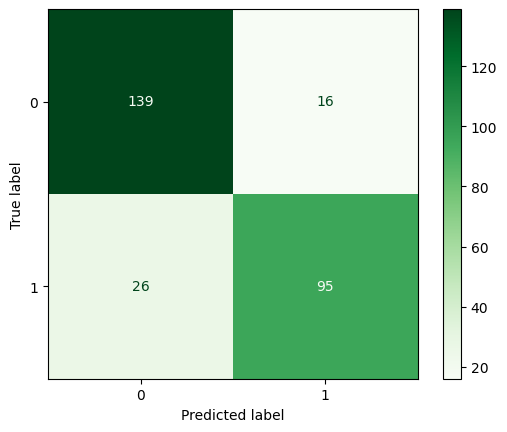

In [24]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt

#compute and print the confusion matrix

cm4 = confusion_matrix(y_test, y_pred)
print(cm4)

from sklearn.metrics import ConfusionMatrixDisplay 
c=df['stress_level'].unique() 

cm4 = confusion_matrix(y_test, y_pred)
class_labels = {0:'0 Low', 1:'1 High'}

# create a confusion matrix display object 
disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=[class_labels[0], class_labels[1]])
disp.plot(cmap=plt.cm.Greens)
plt.show()

#### Confusion Matrix represents the performance measurement of the classification model. we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification.

> From the results, it appears:
The top-left cell: (97) represents the number of instances of the negative class correctly classified as negative (TN).
The top-right cell: (6) represents the number of instances of the negative class incorrectly classified as positive (FP).
The bottom-left cell: (13) represents the number of instances of the positive class incorrectly classified as negative (FN).
The bottom-right cell: (69) represents the number of instances of the positive class correctly classified as positive (TP).

##  Decision Tree :

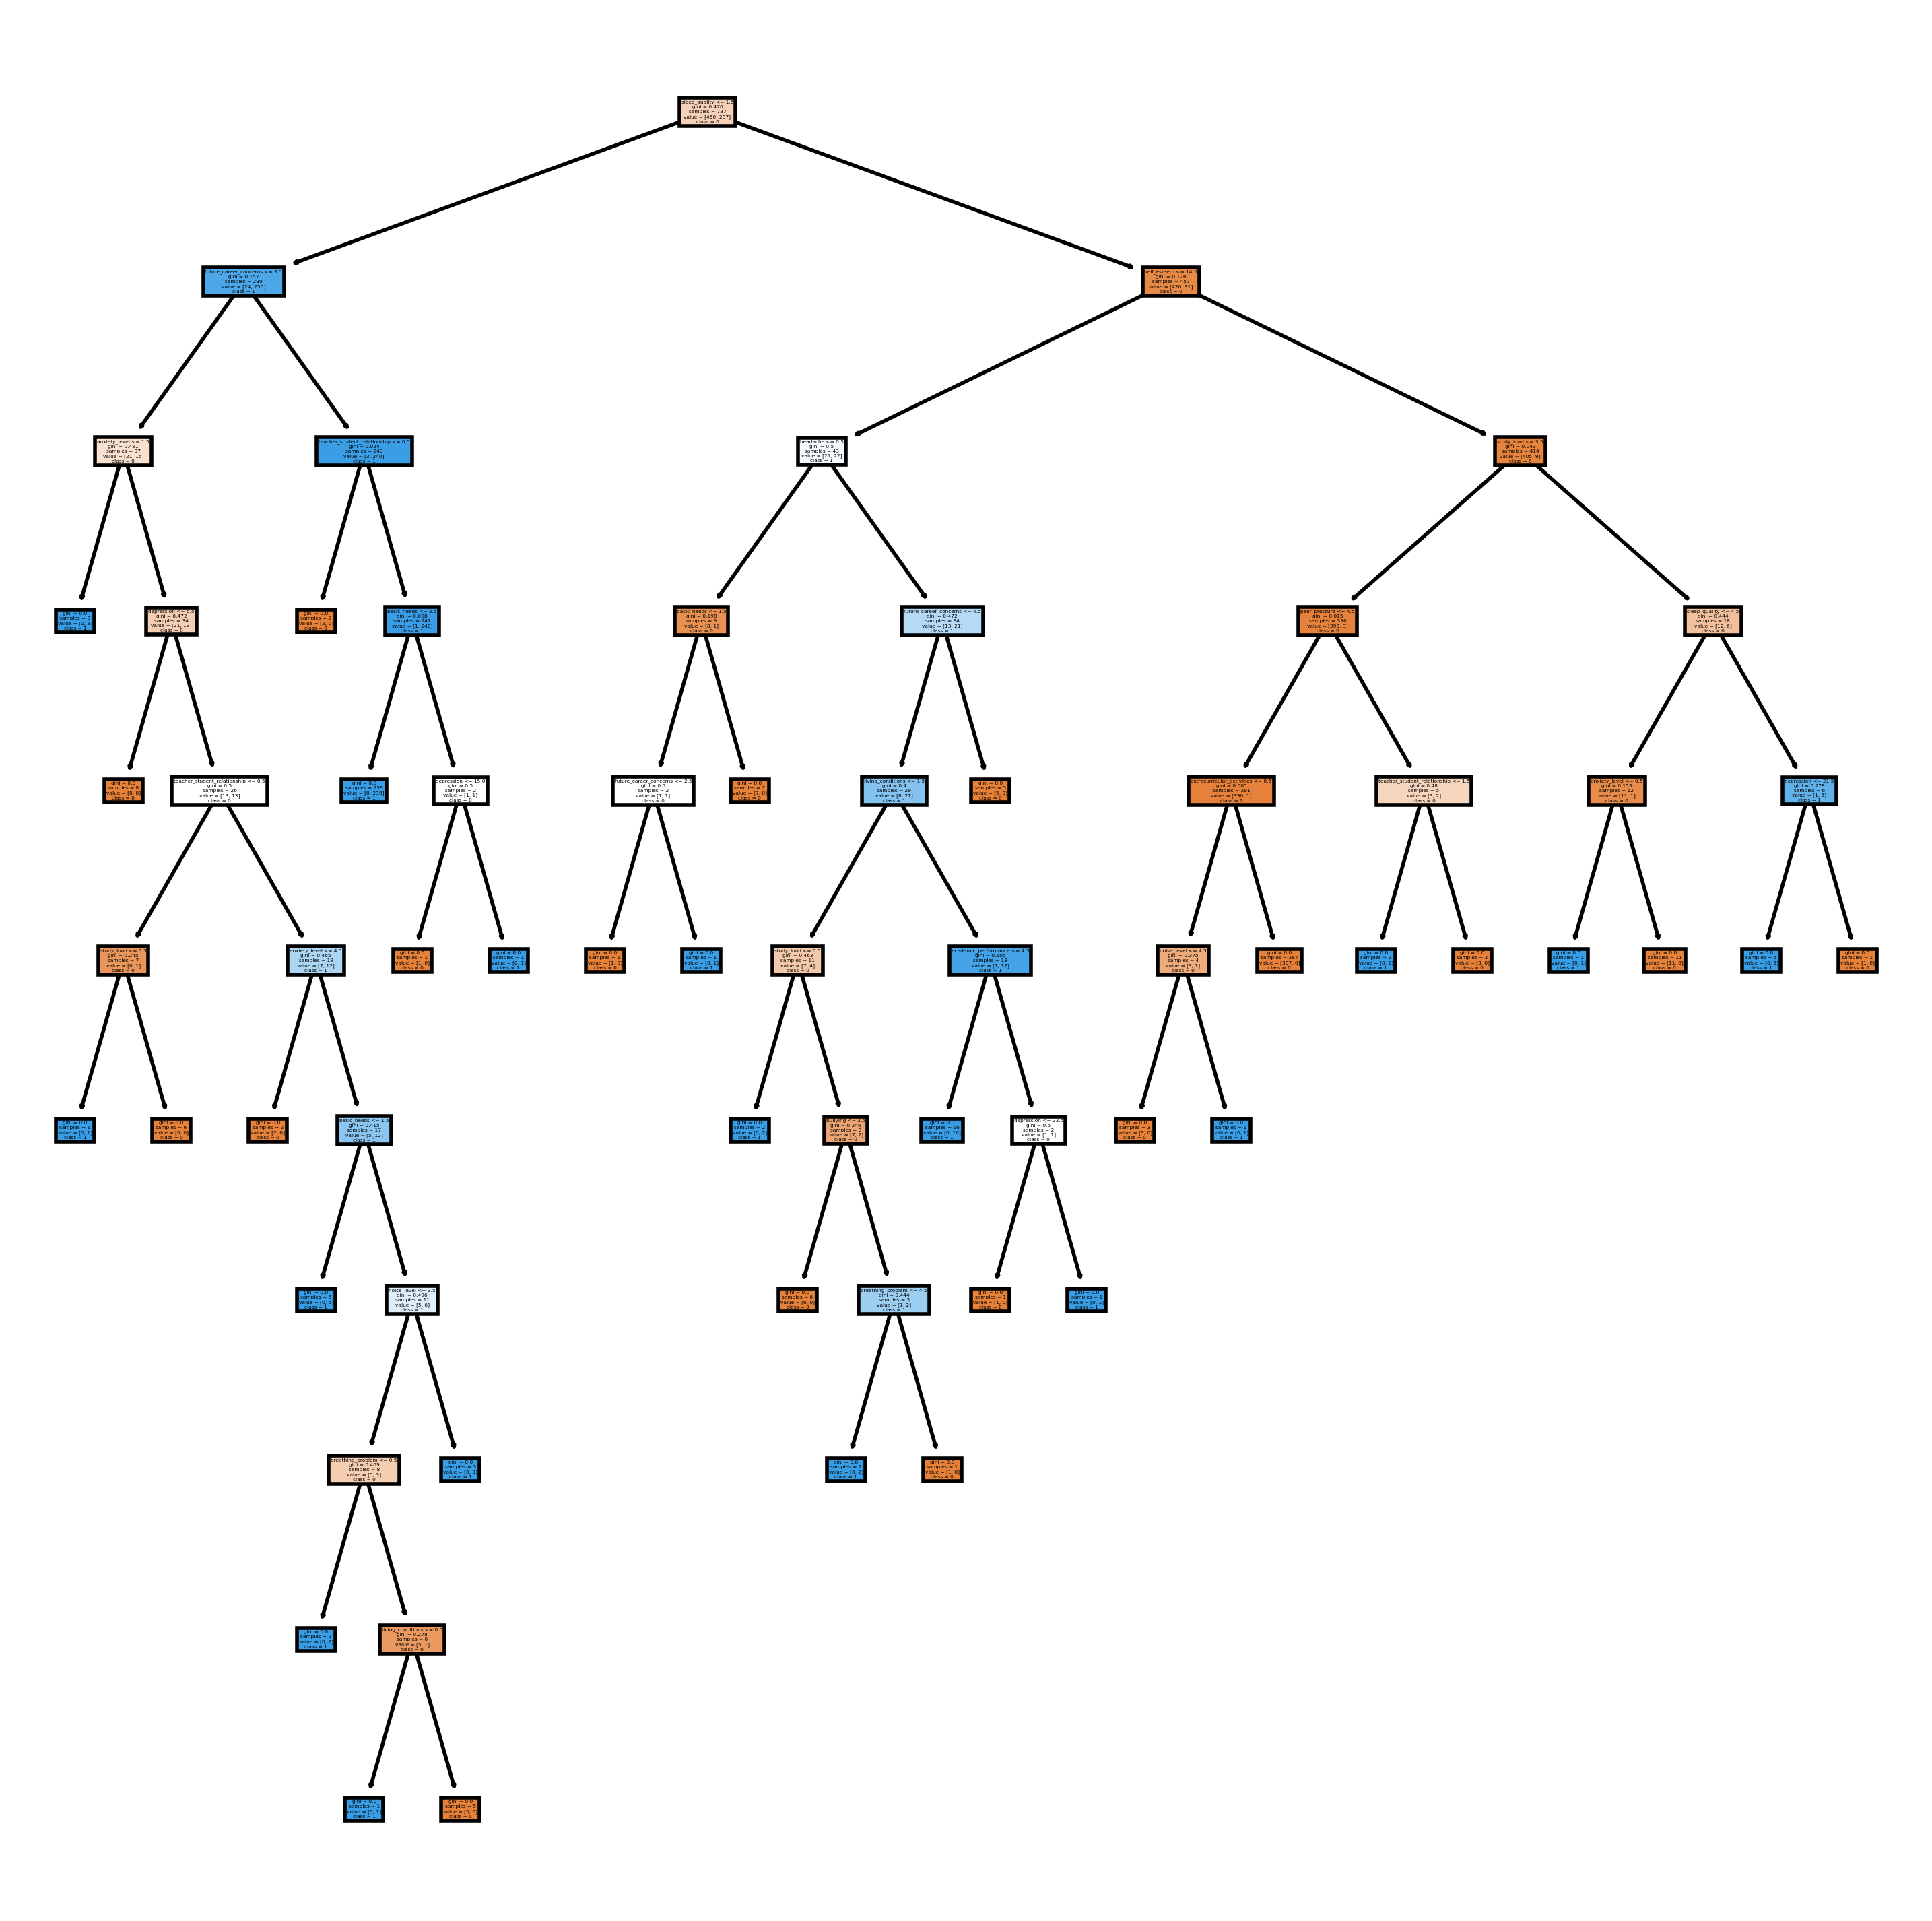

In [21]:
from sklearn import tree

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9,9), dpi=400)


class_labels = {0:'0', 1:'1'}

tree.plot_tree(c4,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1]],  
               filled=True
               )

plt.show()

#### As we shown the tree starts with the root node in this data is (sleep_quality) This means the tree branches out from the root node based on the '(sleep_quality)' value , The tree makes several splits based on the feature values, and these are represented by the decision nodes. The features at each node are selected based on gini index . also we have leaf Node this is the terminal nodes that provide the final classification based on the path taken through the tree.

In [34]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm4)


# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)


# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm4[1, 1]
TN = cm4[0, 0]
FP = cm4[0, 1]
FN = cm4[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity 
specificity = TN / (TN + FP)
print("Specificity:", specificity)


# Precision 
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[139  16]
 [ 26  95]]
Accuracy: 0.8478260869565217
Error Rate: 0.15217391304347827
Sensitivity: 0.7851239669421488
Specificity: 0.896774193548387
Precision: 0.8558558558558559


-Accuracy: measures the proportion of true results. In this case, the model's accuracy is approximately 89%.<br>
-Error Rate: represents the proportion of wrong predictions out of all predictions.Here, the error rate is around 10%.<br>
-Sensitivity (Recall) : measures the proportion of actual positives that are correctly.In this case, it's approximately 84%.<br>
-Specificity : measures the proportion of actual negatives that are correctly.It's around 94% in this scenario.<br>
-Precision : the proportion of positive identifications that were actually correct. Here, it's about 92%.

## Splitting Data into: 70% Training and 30% Test
> The model is trained utilizing the Gini index, the dataset is divided into 70% training and 30% testing .

In [23]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=1)

c5 = DecisionTreeClassifier(criterion='gini')

c5 = c5. fit (X_train, y_train)

y_pred = c5.predict (X_test)

## Confusion Matrix:

[[139  16]
 [ 26  95]]


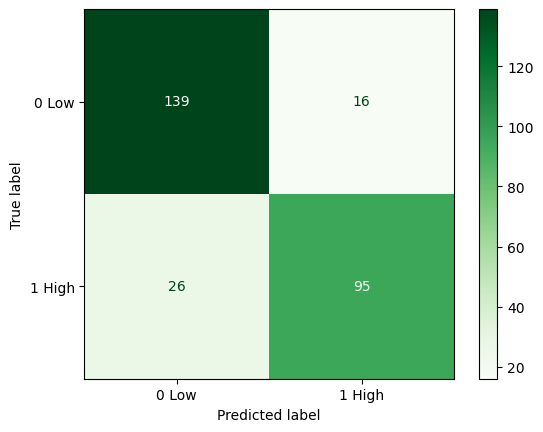

In [35]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt

#compute and print the confusion matrix

cm5 = confusion_matrix(y_test, y_pred)
print(cm5)

from sklearn.metrics import ConfusionMatrixDisplay 
c=df['stress_level'].unique() 

cm5= confusion_matrix(y_test, y_pred)
class_labels = {0:'0 Low', 1:'1 High'}

# create a confusion matrix display object 
disp = ConfusionMatrixDisplay(confusion_matrix=cm5, display_labels=[class_labels[0], class_labels[1]])
disp.plot(cmap=plt.cm.Greens)
plt.show()

#### The Confusion Matrix represents the performance measurement of the classification model. we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification.
<br>
From the results, it appears:<br>
The top-left cell: (149) represents the number of instances of the negative class correctly classified as negative (TN).<br>
The top-right cell: (9) represents the number of instances of the negative class incorrectly classified as positive (FP).<br>
The bottom-left cell: (16) represents the number of instances of the positive class incorrectly classified as negative (FN).<br>
The bottom-right cell: (103) represents the number of instances of the positive class correctly classified as positive (TP).

##  Decision Tree :

<function matplotlib.pyplot.show(close=None, block=None)>

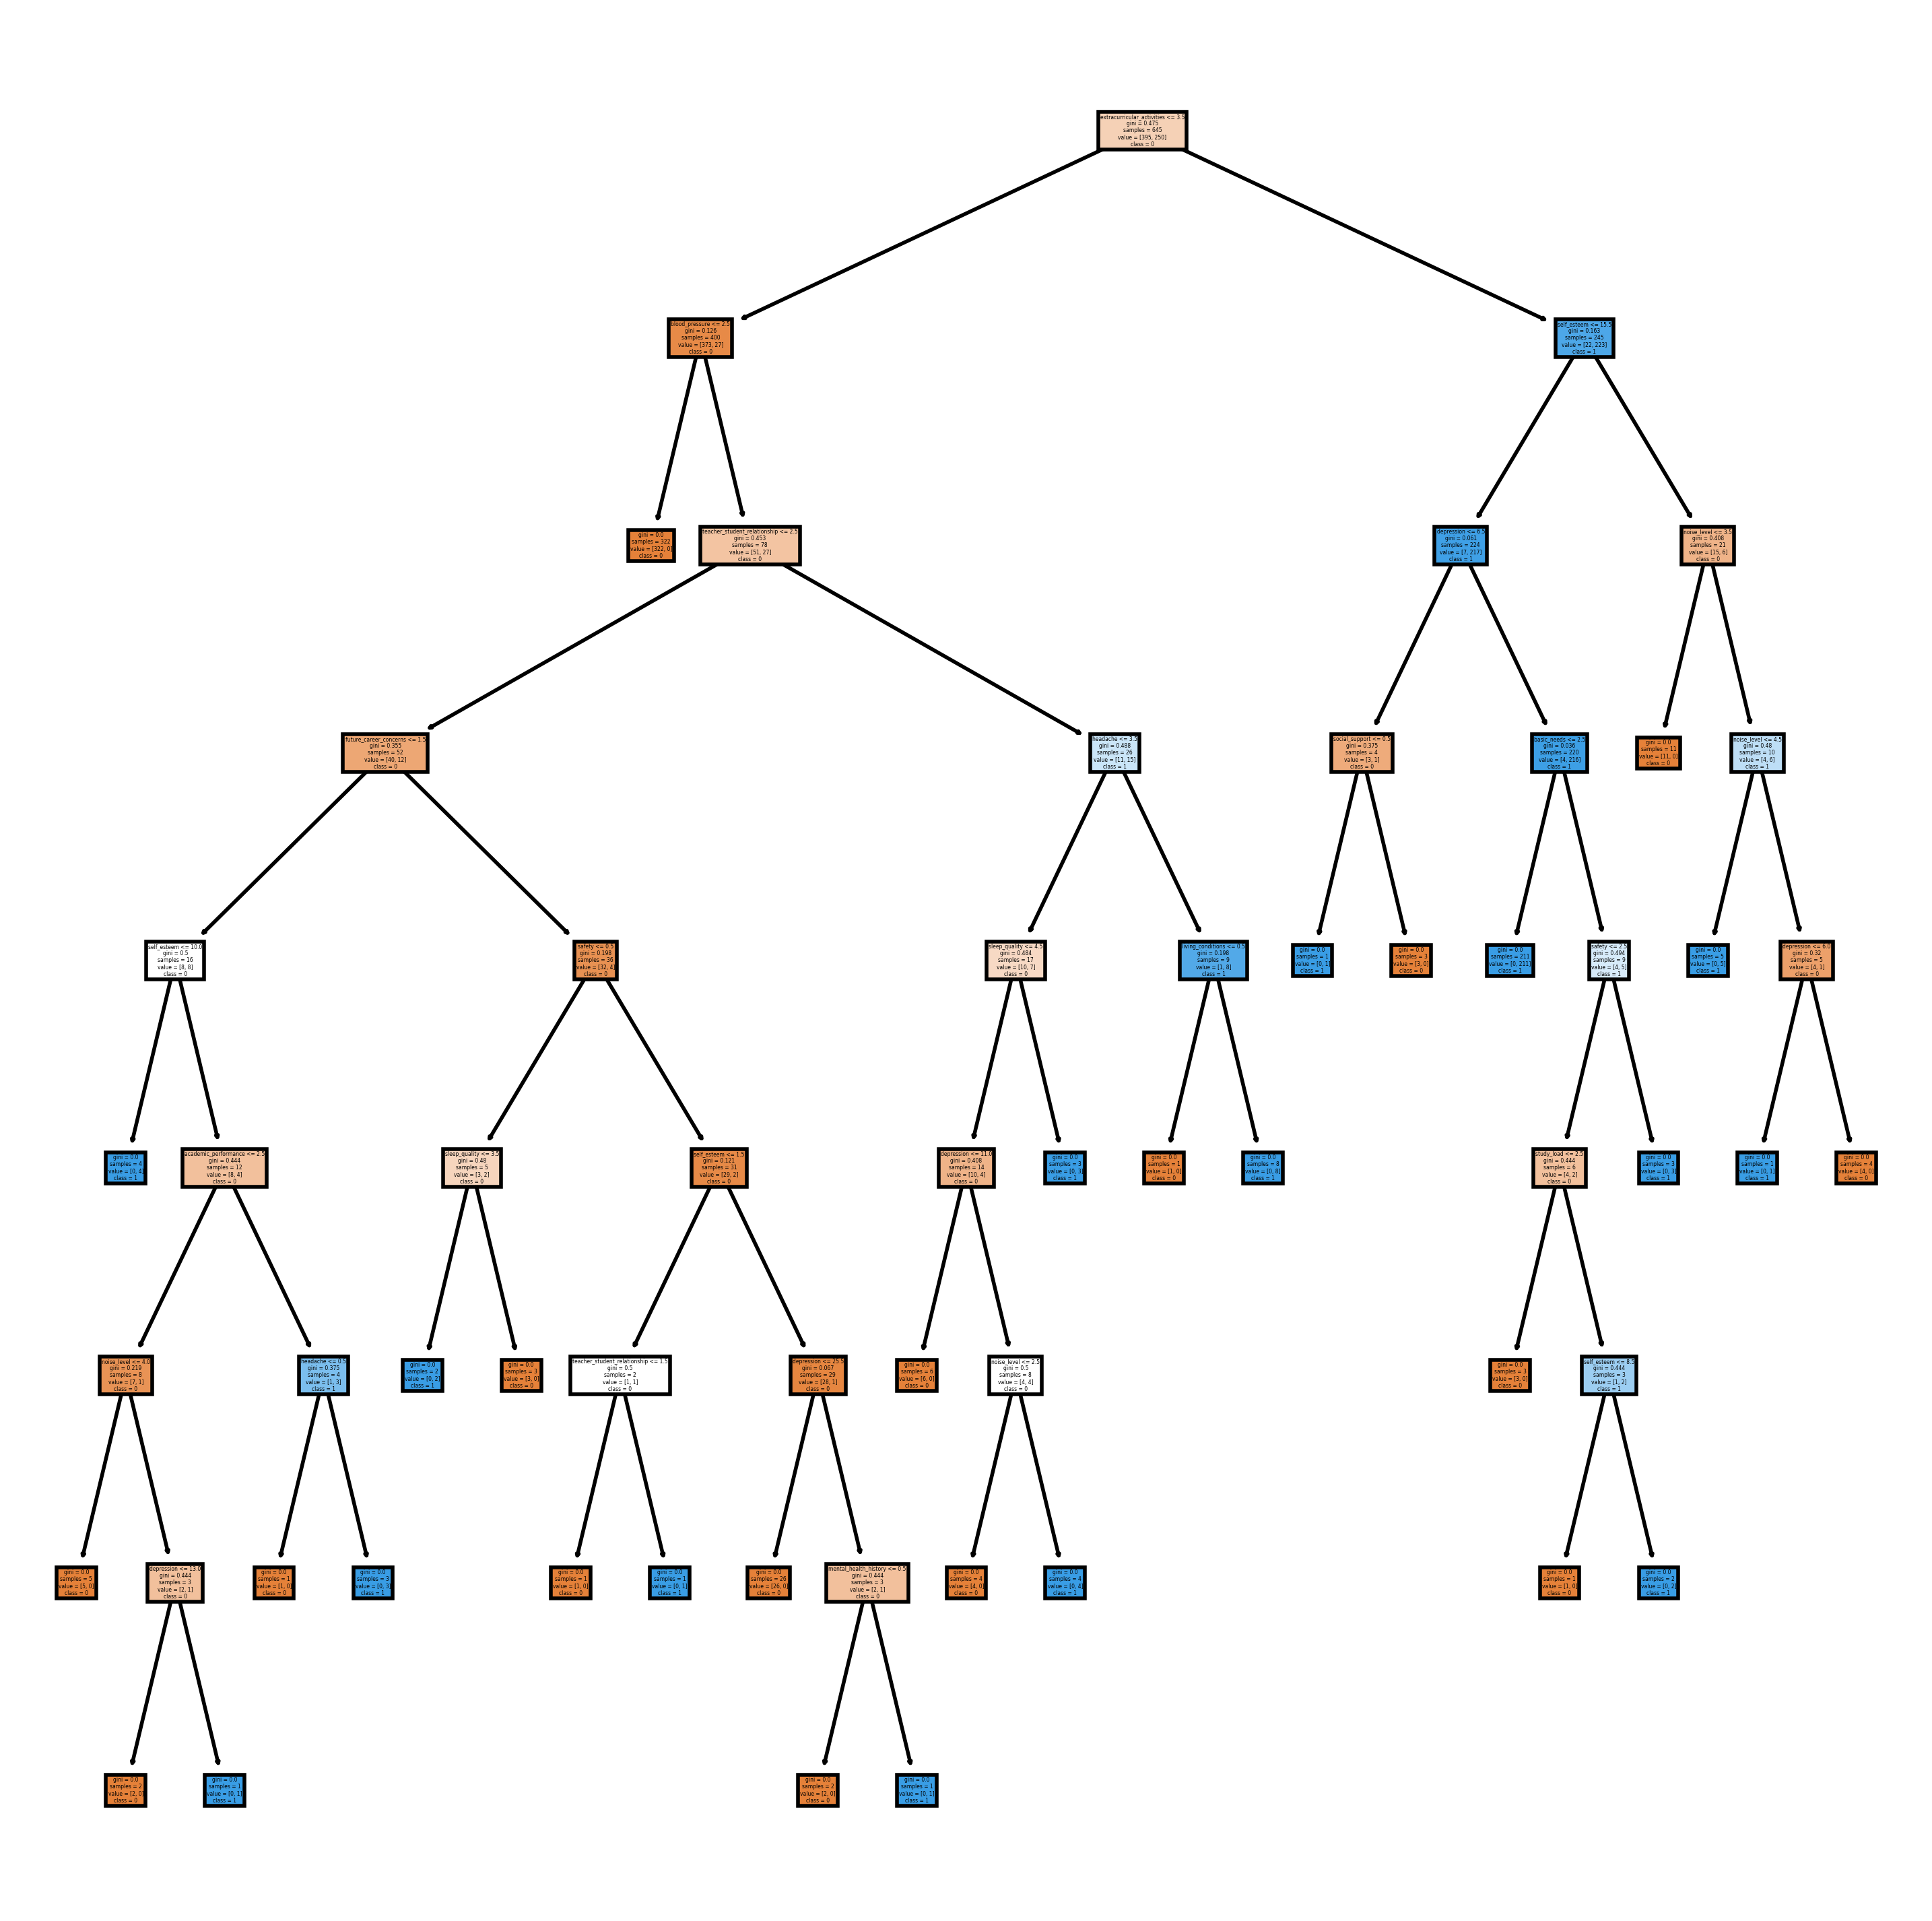

In [26]:
from sklearn import tree

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9,9), dpi=400)


class_labels = {0:'0', 1:'1'}

tree.plot_tree(c5,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1]], 
               filled=True
               )

plt.show

#### As we shown the tree starts with the root node in this data is *extracurricular_activites* This means the tree branches out from the root node based on the '(extracurricular_activites)' value , The tree makes several splits based on the feature values, and these are represented by the decision nodes. The features at each node are selected based on gini index . also we have leaf Node this is the terminal nodes that provide the final classification based on the path taken through the tree

In [27]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm5 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm5)


# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)


# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm4[1, 1]
TN = cm4[0, 0]
FP = cm4[0, 1]
FN = cm4[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity 
specificity = TN / (TN + FP)
print("Specificity:", specificity)


# Precision 
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[149   9]
 [ 16 103]]
Accuracy: 0.9097472924187726
Error Rate: 0.09025270758122739
Sensitivity: 0.8414634146341463
Specificity: 0.941747572815534
Precision: 0.92


-Accuracy: measures the proportion of true results. In this case, the model's accuracy is approximately 90%.<br>
-Error Rate: represents the proportion of wrong predictions out of all predictions.Here, the error rate is around 9%.<br>
-Sensitivity (Recall) : measures the proportion of actual positives that are correctly.In this case, it's approximately 84%.<br>
-Specificity : measures the proportion of actual negatives that are correctly.It's around 94% in this scenario.<br>
-Precision : the proportion of positive identifications that were actually correct. Here, it's about 92%.

## Splitting Data into: 90% Training and 10% Test
> The model is trained utilizing the Gini index, the dataset is divided into 60% training and 04% testing .

In [33]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.1, random_state=1)

c6 = DecisionTreeClassifier(criterion='gini')

c6 = c6. fit (X_train, y_train)

y_pred = c6.predict (X_test)

## Confusion Matrix:

[[139  16]
 [ 26  95]]


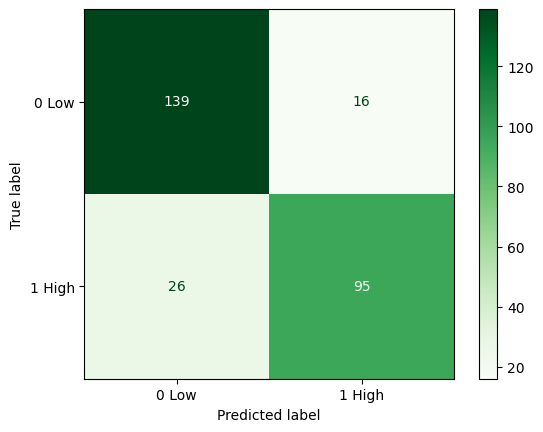

In [36]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt

#compute and print the confusion matrix

cm5 = confusion_matrix(y_test, y_pred)
print(cm5)

from sklearn.metrics import ConfusionMatrixDisplay 
c=df['stress_level'].unique() 

cm6= confusion_matrix(y_test, y_pred)
class_labels = {0:'0 Low', 1:'1 High'}

# create a confusion matrix display object 
disp = ConfusionMatrixDisplay(confusion_matrix=cm5, display_labels=[class_labels[0], class_labels[1]])
disp.plot(cmap=plt.cm.Greens)
plt.show()

#### The Confusion Matrix represents the performance measurement of the classification model. we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification.<br>
From the results, it appears:<br>
The top-left cell: (48) represents the number of instances of the negative class correctly classified as negative (TN).<br>
The top-right cell: (3) represents the number of instances of the negative class incorrectly classified as positive (FP).<br>
The bottom-left cell: (7) represents the number of instances of the positive class incorrectly classified as negative (FN).<br>
The bottom-right cell: (35) represents the number of instances of the positive class correctly classified as positive (TP).<br>

##  Decision Tree :

<function matplotlib.pyplot.show(close=None, block=None)>

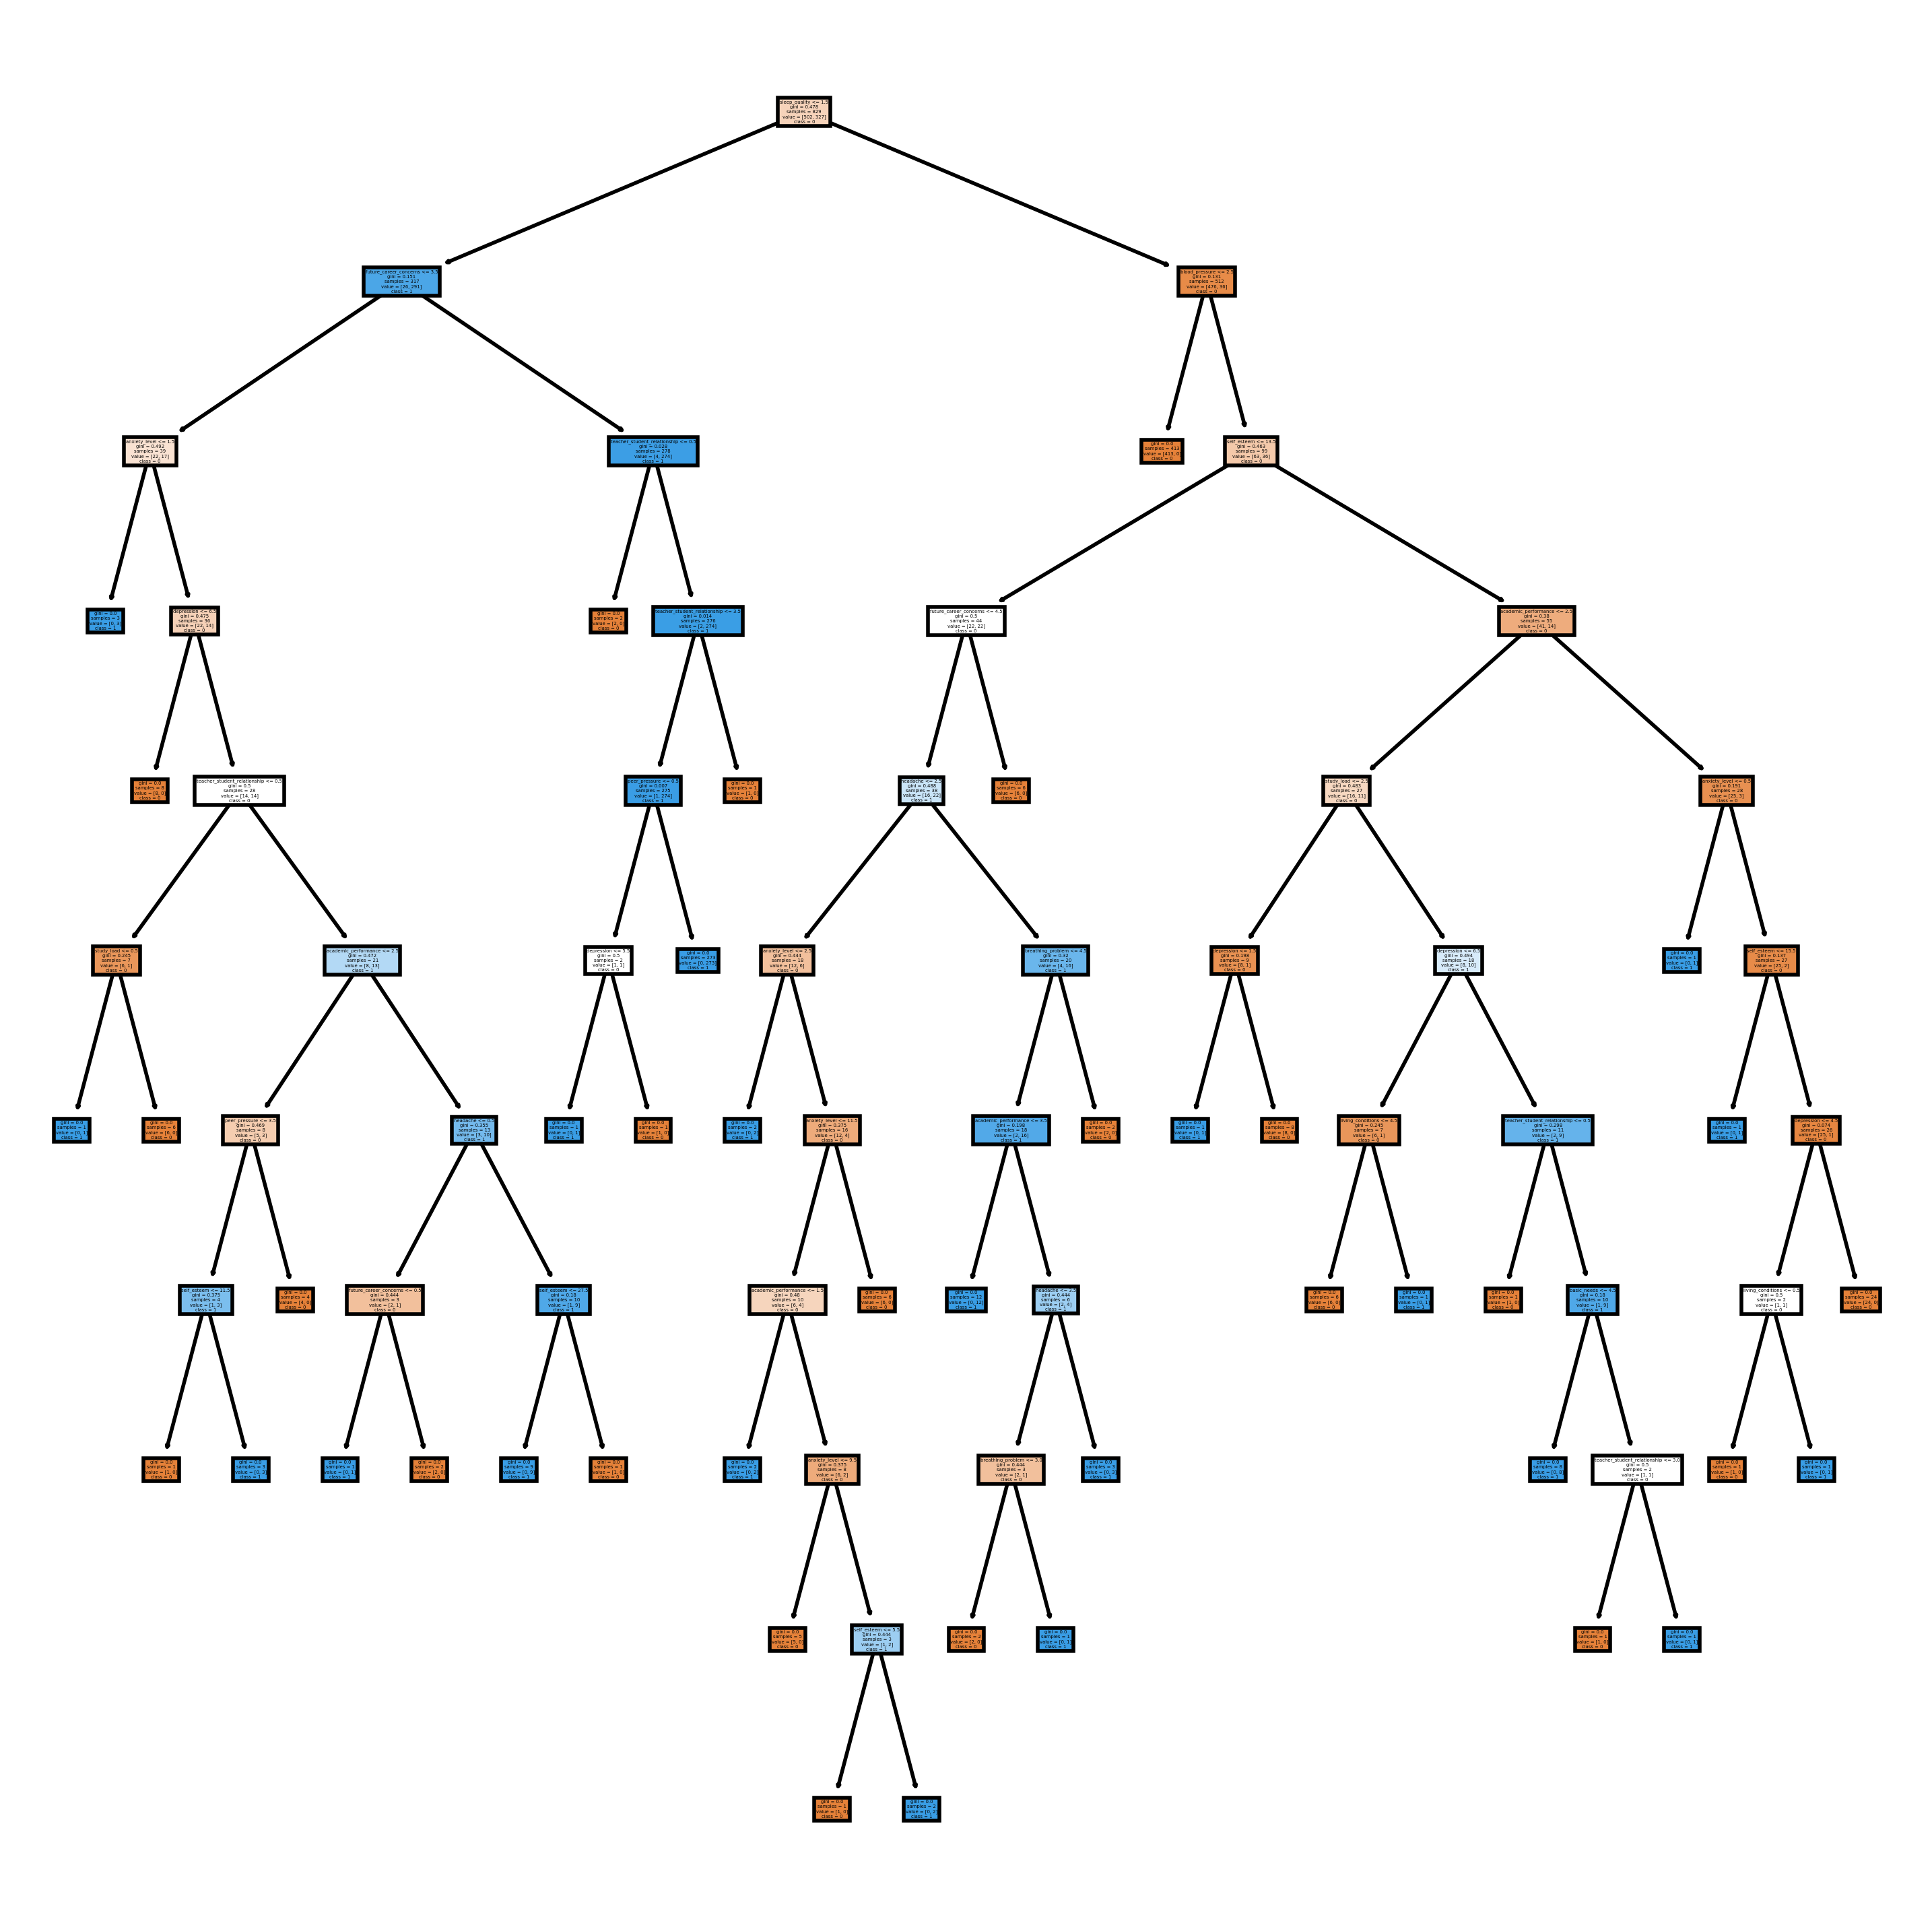

In [35]:
from sklearn import tree

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9,9), dpi=400)


class_labels = {0:'0', 1:'1'}

tree.plot_tree(c6,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1]], 
               filled=True
               )

plt.show

#### As we shown the tree starts with the root node in this data is (sleep quality) This means the tree branches out from the root node based on the 'sleep quality' value , The tree makes several splits based on the feature values, and these are represented by the decision nodes. The features at each node are selected based on gini index . also we have leaf Node this is the terminal nodes that provide the final classification based on the path taken through the tree.

In [36]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm4 = confusion_matrix(y_test,y_pred)
print("confusion matrix : \n",cm6)


# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)


# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm4[1, 1]
TN = cm4[0, 0]
FP = cm4[0, 1]
FN = cm4[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity 
specificity = TN / (TN + FP)
print("Specificity:", specificity)


# Precision 
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[48  3]
 [ 7 35]]
Accuracy: 0.8924731182795699
Error Rate: 0.10752688172043012
Sensitivity: 0.8333333333333334
Specificity: 0.9411764705882353
Precision: 0.9210526315789473


-Accuracy: measures the proportion of true results. In this case, the model's accuracy is approximately 89%.<br>
-Error Rate: represents the proportion of wrong predictions out of all predictions.Here, the error rate is around 10%.<br>
-Sensitivity (Recall) : measures the proportion of actual positives that are correctly.In this case, it's approximately 83%.<br>
-Specificity : measures the proportion of actual negatives that are correctly.It's around 94% in this scenario.<br>
-Precision : the proportion of positive identifications that were actually correct. Here, it's about 92%.

> lets compare between the different partitions results in GINI INDEX : <br>

> Among these partitioning, the model trained on the 70% training set and 30% testing achieved the highest accuracy (0.909 or 90% ), followed by the model trained on the 80% training set and 20% testing set (0.897 or 89%),followed by the model trained on the 90% training set and 10% testing set with an accuracy of (0.892 or 89% ).<br>

> For error rate, the model trained on the 90% training set and 10% testing set achieved the highest error rate (0.107 or 10.7%), followed by the models trained on the 80% training set and 20% testing set (0.102 or 10.2% ), and the 70% training set and 30% testing set (0.09 or 9%).<br>For error rate, the model trained on the 90% training set and 10% testing set achieved the highest error rate (0.107 or 10.7%), followed by the models trained on the 80% training set and 20% testing set (0.102 or 10.2% ), and the 70% training set and 30% testing set (0.09 or 9%).<br>

> For sensitivity, the model trained on the 70% training set and 30% testing and model trained on the 80% training set and 20% set achieved the highest sensitivity (0.841 or 84%), followed by the models trained on the 90% training set and 10% testing set (0.83 or 83% ).<br>

> For specificity, the model trained on the 70% training set and 30% testing and model trained on the 80% training set and 20% set achieved the highest sensitivity (0.9417 or 94%), followed by the models trained on the 90% training set and 10% testing set (0.941 or 94% ).<br>


> In terms of precision, the model trained on the 90% training set and 10% testing set obtained the highest precision (0.92 or 92%),, followed by the model trained on the 80% training set and 20% testing set and the model trained on the 70% training set and 30% testing set (0.92 or 92% ).<br>


##### The model trained with a 70% training set and a 30% testing set seems to be the best performer across most metrics:

It has the highest accuracy which suggests that it generally makes the correct predictions most often.
It has the lowest error rate, meaning it makes fewer mistakes than the other models.
It shares the highest sensitivity with the 80% training set model, indicating it is as good at identifying positive cases.
It also shares the highest specificity with the 80% training set model, indicating it is as good at identifying negative cases.
Although precision is equally high across all models, the balance of high accuracy, low error rate, high sensitivity, and high specificity makes the 70/30 partition model the most robust among the three. Precision alone isn't enough to deem a model the best, as it doesn't consider the true negatives.

# The best model between information gain and the Gini index:

To compare the models based on Gini Index and Information Gain  we need to look at the evaluation metrics provided for each and see which set of metrics represents the best model performance. 

**Gini Index Results:**
- **Accuracy**: Best is 70% train / 30% test with 90.9%
- **Error Rate**: Best is 70% train / 30% test with 9%
- **Sensitivity**: Best is 70% train / 30% test & 80% train / 20% test with 84.1%
- **Specificity**: Best is 70% train / 30% test & 80% train / 20% test with 94.17%
- **Precision**: All partitions are tied with 92%

**Information Gain (IG) Results:**
- **Accuracy**: Best is 90% train / 10% test with 85%
- **Error Rate**: Best is 90% train / 10% test with 14%
- **Sensitivity**: Best is 90% train / 10% test with 81%
- **Specificity**: Best is 90% train / 10% test & 70% train / 30% test with 89%
- **Precision**: Best is 70% train / 30% test with 85%

Comparing the best performers from each metric and each method:

**Accuracy**:
- Gini Index (70/30): 90.9% is higher than IG (90/10): 85%.

**Error Rate**:
- Gini Index (70/30): 9% is lower than IG (90/10): 14%.

**Sensitivity**:
- Gini Index (70/30): 84.1% is higher than IG (90/10): 81%.

**Specificity**:
- Gini Index and IG both perform similarly at their best.

**Precision**:
- Gini Index (90/10): 92% is higher than IG (70/30): 85%.

Based on the comparison of these metrics, the model trained with a 70% training set and 30% testing set using the Gini Index appears to be superior. It has higher accuracy, lower error rate, and higher sensitivity compared to the best performer using Information Gain, which was the 90% training set and 10% testing set. Although both Gini Index and IG have the same specificity, Gini Index has higher precision.

The Gini Index is designed to minimize the probability of misclassification, while Information Gain is meant to maximize the mutual information between the features and the target. The choice between these two might depend on the specific use case, but based on the overall performance metrics provided, the Gini Index seems to yield a better model for this particular dataset and partitioning strategy.

# Clustring 


 Clustering: The main goal of clustering is to group similar data points together based on certain features or attributes, without knowing the specific labels or classes beforehand. The aim is to discover inherent patterns or structures within the data, which can help in understanding the underlying relationships and organization.


We tried 3 different number of clusters:

K=1, K=2, K=3

### Silhouette method

The Silhouette method is a way to evaluate how well a dataset has been clustered.
It calculates a silhouette score for each data point, which measures how similar that point is to its own cluster compared to other clusters. The score ranges from -1 to 1, where a high score indicates that the point is well-clustered, while a low score suggests that it may be in the wrong cluster. 
This method helps in determining the optimal number of clusters and assessing the overall quality of the clustering.

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

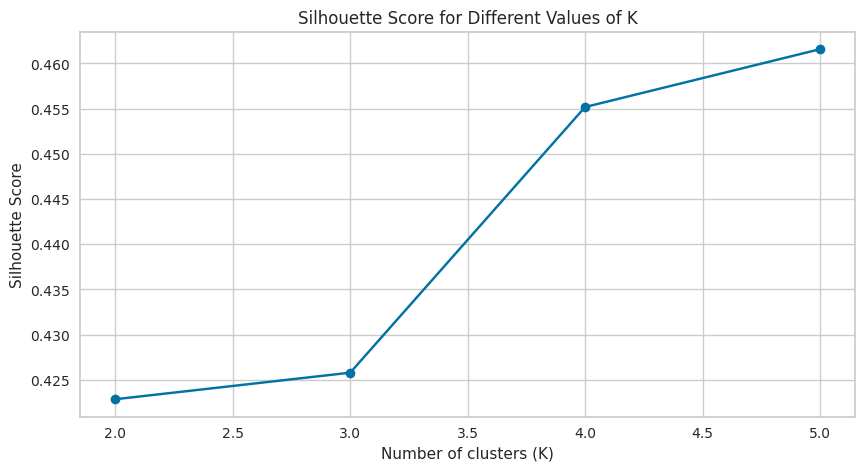

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('balanced_dataset.csv')

# Extract the features (excluding the target variable, if any)
features = df.drop(df.columns[0], axis=1)  # Replace 'target_column' with your actual target column

# Use StandardScaler to scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create a new DataFrame with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Function to apply K-means clustering and evaluate using silhouette coefficient
def apply_kmeans_with_silhouette(df, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)
    silhouette_avg = silhouette_score(df, labels)
    return silhouette_avg

# Function to apply K-means clustering and evaluate using the elbow method
def apply_kmeans_with_elbow(df, max_k):
    inertia = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df)
        inertia.append(kmeans.inertia_)
    return inertia

# Choose sizes of K
K_values = [2, 3, 4, 5]

# Apply K-means clustering for each K value and evaluate using silhouette coefficient
silhouette_scores = []
for k in K_values:
    silhouette_avg = apply_kmeans_with_silhouette(scaled_df, k)
    silhouette_scores.append(silhouette_avg)

# Apply K-means clustering for each K value and evaluate using the elbow method
elbow_scores = apply_kmeans_with_elbow(scaled_df, max(K_values))
# Plot Silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(K_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of K')
plt.show()


### Elbow method 


The Elbow method is a technique used in clustering analysis, particularly with k-means clustering, to determine the optimal number of clusters in a dataset. It involves plotting the number of clusters against the within-cluster sum of squares (WCSS), where the optimal number of clusters is typically located at the "elbow" point on the plot, indicating a significant decrease in WCSS.

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

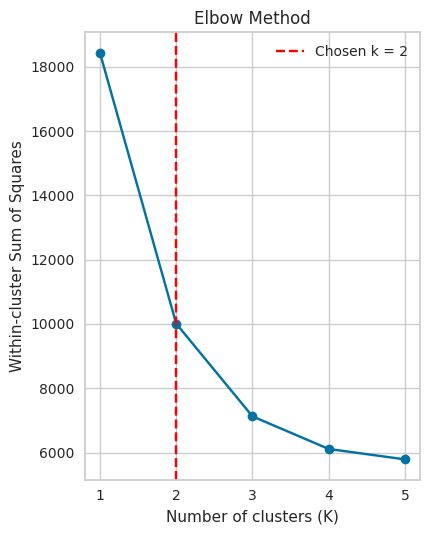

In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import piplite
await piplite.install('kneed')
from kneed import KneeLocator

# Load the dataset
df = pd.read_csv('balanced_dataset.csv')

# Extract the features (excluding the target variable, if any)
features = df.drop(df.columns[0], axis=1)  # Replace 'target_column' with your actual target column

# Use StandardScaler to scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create a new DataFrame with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Function to apply K-means clustering and evaluate using silhouette coefficient
def apply_kmeans_with_silhouette(df, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)
    silhouette_avg = silhouette_score(df, labels)
    return silhouette_avg

# Function to apply K-means clustering and evaluate using the elbow method
def apply_kmeans_with_elbow(df, max_k):
    inertia = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df)
        inertia.append(kmeans.inertia_)
    return inertia

# Choose sizes of K
K_values = [2, 3, 4, 5]

# Apply K-means clustering for each K value and evaluate using silhouette coefficient
silhouette_scores = []
for k in K_values:
    silhouette_avg = apply_kmeans_with_silhouette(scaled_df, k)
    silhouette_scores.append(silhouette_avg)

# Apply K-means clustering for each K value and evaluate using the elbow method
elbow_scores = apply_kmeans_with_elbow(scaled_df, max(K_values))

# Plot Elbow scores
plt.subplot(1, 2, 2)
plt.plot(range(1, max(K_values) + 1), elbow_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-cluster Sum of Squares')
plt.title('Elbow Method')

# Use KneeLocator to locate the turning point
knee = KneeLocator(range(1, max(K_values) + 1), elbow_scores, curve='convex', direction='decreasing')
turning_point = knee.elbow

plt.axvline(x=turning_point, linestyle='--', color='red', label=f'Chosen k = {turning_point}')
plt.legend()

plt.tight_layout()
plt.show()


### k-Means Algorithm

Each cluster is represented by the center of the cluster

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Read the dataset
df = pd.read_csv('balanced_dataset.csv')
# Assuming 'df' is your DataFrame
# Extract the features (excluding the target variable, if any)
features = df.drop(df.columns[0], axis=1)  # Replace 'target_column' with your actual target column

# Use StandardScaler to scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create a new DataFrame with the scaled features
USArrests_scaled = pd.DataFrame(scaled_features, columns=features.columns)

# Display the scaled DataFrame
print("\nScaled DataFrame:")
print(USArrests_scaled.head())


Scaled DataFrame:
   self_esteem  mental_health_history  depression  headache  blood_pressure  \
0     0.441435               0.936910   -0.024161  0.265141       -1.538682   
1     0.879662               0.936910   -0.403881 -0.429348       -1.538682   
2    -0.106348               0.936910   -0.277308  0.265141       -1.538682   
3     0.989219              -1.067338   -0.910173 -1.123837       -0.323031   
4     1.427446              -1.067338   -1.289892 -1.123837       -0.323031   

   sleep_quality  breathing_problem  noise_level  living_conditions    safety  \
0      -0.340877          -0.584968     0.191860           0.482441 -0.460660   
1       0.297921          -0.584968    -0.548286          -0.398372  0.248402   
2       0.297921           0.843749    -0.548286           0.482441  0.248402   
3       0.936719          -1.299327    -1.288432           0.482441  1.666526   
4       0.936719          -0.584968    -0.548286           0.482441  0.957464   

   basic_needs  aca

### k=3

In [28]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df_scaled is your scaled dataset
# Replace this with your actual scaled data
df_scaled = np.array([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

# Set a seed for random number generation
np.random.seed(42)

# Perform K-means clustering for K=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')  # Set n_init explicitly
kmeans_result = kmeans.fit(df_scaled)

# Print the clustering result 
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)



Cluster Centers:
[[3. 4.]
 [5. 6.]
 [1. 2.]]

Cluster Labels:
[2 0 1]


## k=2

In [29]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df_scaled is your scaled dataset
# Replace this with your actual scaled data
df_scaled = np.array([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

# Set a seed for random number generation
np.random.seed(42)

# Perform K-means clustering for K=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')  # Set n_init explicitly
kmeans_result = kmeans.fit(df_scaled)

# Print the clustering result 
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[2. 3.]
 [5. 6.]]

Cluster Labels:
[0 0 1]


## k=1 

In [2]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df_scaled is your scaled dataset
# Replace this with your actual scaled data
df_scaled = np.array([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

# Set a seed for random number generation
np.random.seed(42)

# Perform K-means clustering for K=1
kmeans = KMeans(n_clusters=1, random_state=42, n_init='auto')  # Set n_init explicitly
kmeans_result = kmeans.fit(df_scaled)

# Print the clustering result 
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[3. 4.]]

Cluster Labels:
[0 0 0]


#### Clustering visualization

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


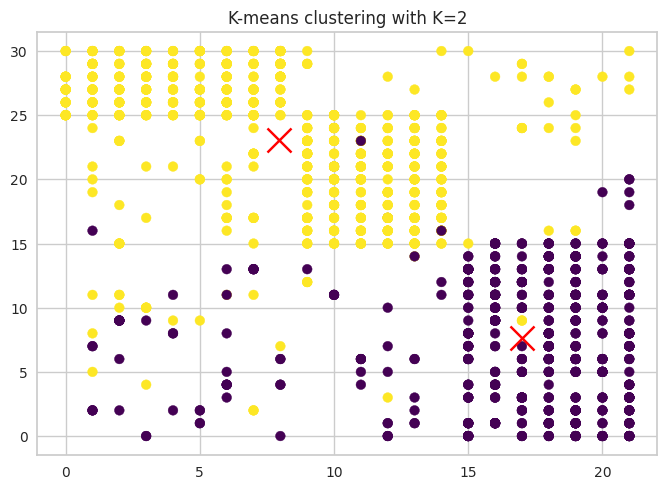

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


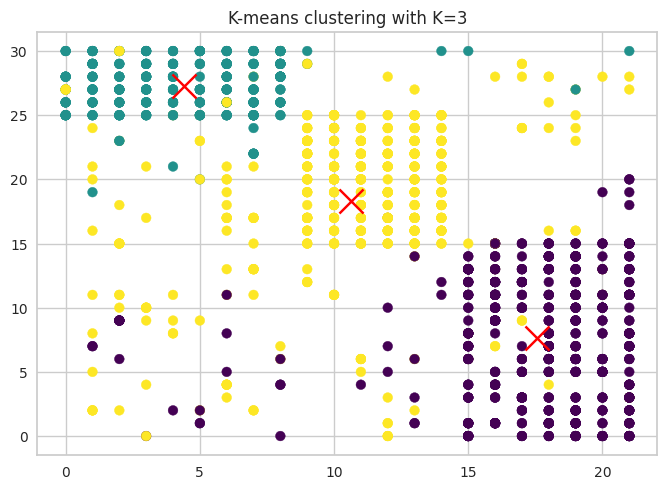

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


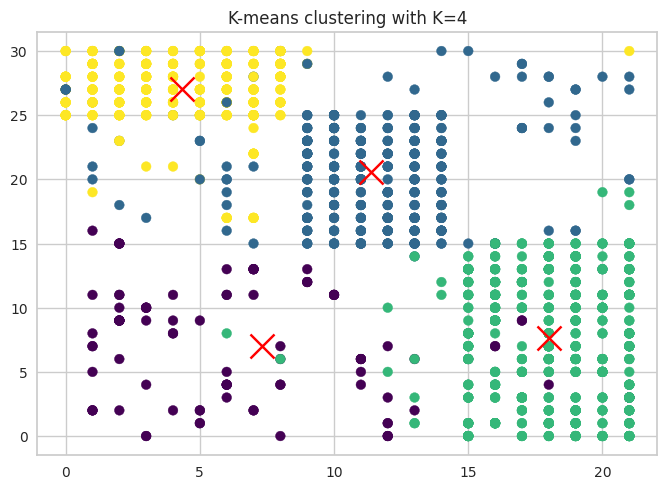

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


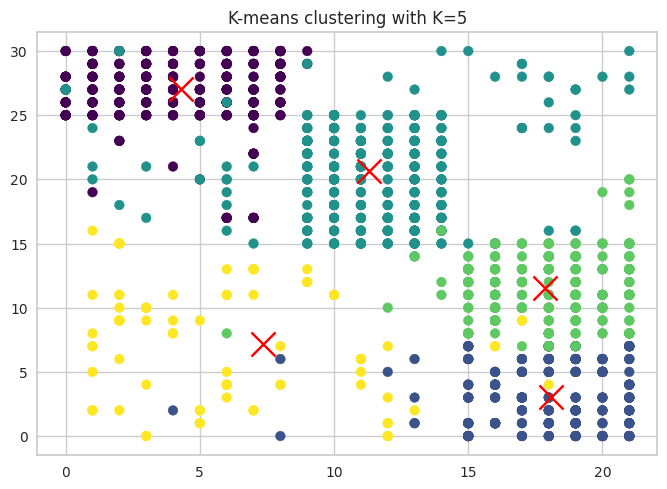

K=2: Silhouette coefficient = 0.4999672983600585, Elbow (total within-cluster sum of square) = 129783.48178730189
K=3: Silhouette coefficient = 0.44360786101851196, Elbow (total within-cluster sum of square) = 93693.17497421752
K=4: Silhouette coefficient = 0.4525053323874461, Elbow (total within-cluster sum of square) = 79218.59628172338
K=5: Silhouette coefficient = 0.3659718502520776, Elbow (total within-cluster sum of square) = 67708.81857418169


In [66]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('balanced_dataset.csv')

# Choose sizes of K
K_values = [2, 3, 4,5]

# Initialize empty lists to store evaluation metrics
silhouette_scores = []
total_within_cluster_sum_of_squares = []

for K in K_values:
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(data)
    
    # Calculate Silhouette coefficient
    silhouette_score_value = silhouette_score(data, kmeans.labels_)
    silhouette_scores.append(silhouette_score_value)
    
    # Calculate Elbow method - total within-cluster sum of square
    total_within_cluster_sum_of_square = kmeans.inertia_
    total_within_cluster_sum_of_squares.append(total_within_cluster_sum_of_square)
    
    # Visualize the clustering results
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=kmeans.labels_, cmap='viridis') # Assuming first two columns are features
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')
    plt.title(f'K-means clustering with K={K}')
    plt.show()

# Print out the evaluation metrics
for i, K in enumerate(K_values):
    print(f'K={K}: Silhouette coefficient = {silhouette_scores[i]}, Elbow (total within-cluster sum of square) = {total_within_cluster_sum_of_squares[i]}')

In [75]:
%pip install yellowbrick

In [78]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

# Assuming `kmeans` from previous code is defined as KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')  # Corrected typo
visualizer.fit(USArrests_scaled)  # Assuming `USArrests_scaled` is your scaled data
visualizer.show()

/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


<class 'ValueError'>: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- anxiety_level


The KMeans Clustering for 1462 Samples in 5 Centers shows mostly positive silhouette scores, indicating good clustering where data points are well-matched to their clusters and distant from others. However, this doesn't guarantee a flawless solution. Some overlap or ambiguity between clusters might exist, especially with silhouette scores close to 0 or negative values

In [9]:
%pip install seaborn 

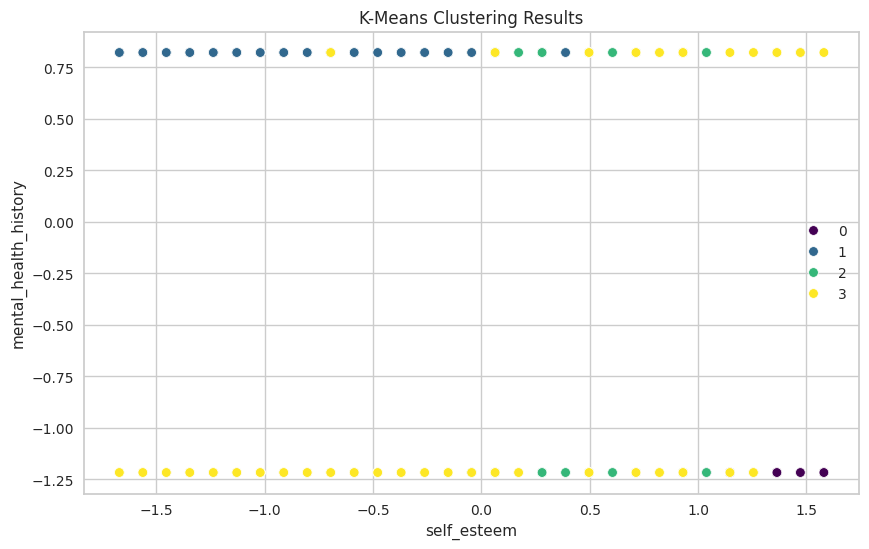

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Run k-means clustering with 4 clusters
USArrests_scaled['Cluster'] = kmeans_result.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=USArrests_scaled.columns[0], y=USArrests_scaled.columns[1], hue='Cluster', data=USArrests_scaled, palette='viridis')
plt.title('K-Means Clustering Results')
plt.xlabel(USArrests_scaled.columns[0])
plt.ylabel(USArrests_scaled.columns[1])
plt.legend()
plt.show()